In [202]:
from schemes import * 
from tools import *
from fourier_adams import * 
from bsde_solver import * 

### 0. Theorical foundations 

**Assumption.** Assume that there exists a stochastic process $(\Theta_u^t)_{t \le u \le T}$, adapted to the filtration $(\mathscr{F}_t)_{t \in [0,T]}$, and a mapping
$\operatorname{P} : [0,T] \times [0,\infty) \times \mathcal{C}([0,T], \mathbb{R}) \longrightarrow \mathbb{R},$
such that, for any $t \in [0,T]$,
$$P_t = \operatorname{P}\!\left(t, S_t, \big(\Theta_u^t\big)_{t \le u \le T}\right).$$

<div style="border:solid 1px; border-radius:8px; padding: 6px 8px 6px 8px; margin-top: 12px; border-color:rgb(0, 62, 92, 0.5); background-color:rgb(251, 251, 251);"> 
    <strong>Theorem.</strong> Under the previous assumption, the option price is the unique solution to the following linear curve-dependent partial differential equation (CPDE):
$$\begin{cases}
0
=
\Big(
\partial_t
+ \mathcal{L}_x
+ \mathcal{L}_{xx}
+ \mathcal{L}_{x\omega}
+ \mathcal{L}_\omega
+ \mathcal{L}_{\omega\omega}
- r_t
\Big)
\,\operatorname{P}(t, S_t, \Theta^t), \\[6pt]
\operatorname{P}(T, S_T, \Theta^T) = g(S_T).
\end{cases}$$

At a point $(t, x, \Theta^t)$, the operators are defined as
\begin{align*}
    \langle \partial_{\omega}\operatorname{P}(t,x,\Theta^t), K^t\rangle  &:= \lim_{\varepsilon\downarrow 0} \frac{\operatorname{P}(t,x,\Theta^t+\varepsilon K^t\mathbf{1}_{[t,T]}) - \operatorname{P}(t,x,\Theta^t)}{\varepsilon}\\
    \langle \partial_{x,\omega}\operatorname{P}(t,x,\Theta^t), K^t\rangle &:= \lim_{\varepsilon\downarrow 0} \dfrac{\partial_x \operatorname{P}(t,x,\Theta^t+\varepsilon K^t\mathbf{1}_{[t,T]}) - \partial_x \operatorname{P}(t,x, \Theta^t)}{}\\
    \langle \partial_{\omega}^2\operatorname{P}(t,x,\Theta^t), (K^t,K^t)\rangle &:= \lim_{\varepsilon\downarrow 0} \dfrac{\langle \partial_\omega \operatorname{P}(t,x,\Theta^t+\varepsilon K^t\mathbf{1}_{[t,T]}), K^t\rangle - \langle \partial_\omega \operatorname{P}(t,x,\Theta^t),K^t \rangle}{\varepsilon}
\end{align*}
where $K^t := K(\cdot - t)$ for all $t \ge 0$. In our case, $g(\cdot)  =(\cdot -K)^+$.
</div>   

The functional derivates are defined as follows: 
\begin{align*}
    \langle \partial_{\omega}\operatorname{P}(t,x,\Theta^t), K^t\rangle  &:= \lim_{\varepsilon\downarrow 0} \frac{\operatorname{P}(t,x,\Theta^t+\varepsilon K^t\mathbf{1}_{[t,T]}) - \operatorname{P}(t,x,\Theta^t)}{\varepsilon},\\
    \langle \partial_{x,\omega}\operatorname{P}(t,x,\Theta^t), K^t\rangle &:= \lim_{\varepsilon\downarrow 0} \dfrac{\partial_x \operatorname{P}(t,x,\Theta^t+\varepsilon K^t\mathbf{1}_{[t,T]}) - \partial_x \operatorname{P}(t,x, \Theta^t)}{},\\
    \langle \partial_{\omega}^2\operatorname{P}(t,x,\Theta^t), (K^t,K^t)\rangle &:= \lim_{\varepsilon\downarrow 0} \dfrac{\langle \partial_\omega \operatorname{P}(t,x,\Theta^t+\varepsilon K^t\mathbf{1}_{[t,T]}), K^t\rangle - \langle \partial_\omega \operatorname{P}(t,x,\Theta^t),K^t \rangle}{\varepsilon}.
\end{align*}

This formulation justifies the terminology *curve-dependent*. Indeed, the equation is not fully path-dependent, since for any fixed time $t$, it only depends on the future portion of the curve.

The proposed approach consists in discretizing the CPDE along a suitable functional basis, thereby reducing the originally infinite-dimensional problem to a finite-dimensional one. The resulting system, however, remains high-dimensional and consequently suffers from the curse of dimensionality, making it challenging to solve with classical numerical methods.
In the sequel, a backward algorithm is introduced to tackle this system of partial differential equations.

For each $t \in [0,T]$, we consider, for a fixed integer $p$, a family of càdlàg basis functions
$\boldsymbol{\psi}^t = (\psi_a^t)_{a=1,\ldots,p}$, used to approximate both $\Theta^t$ and $K^t$ as
$$\widehat{\Theta}^t
:= \boldsymbol{\theta}^t \cdot (\boldsymbol{\psi}^t)^\top
= \sum_{a=1}^p \theta_a^t \psi_a^t,
\qquad
\widehat{K}^t
:= \boldsymbol{\kappa}^t \cdot (\boldsymbol{\psi}^t)^\top
= \sum_{a=1}^p \kappa_a^t \psi_a^t,$$
for real-valued coefficient vectors
$\boldsymbol{\theta}^t := (\theta_a^t)_{a=1,\ldots,p}$ and
$\boldsymbol{\kappa}^t := (\kappa_a^t)_{a=1,\ldots,p}$.

Since $K^t$ is a càdlàg function on $[t,T]$, we have by definition
$$\big\langle \partial_\omega \operatorname{P}(t,x,\Theta^t), K^t \big\rangle
:= \partial_\varepsilon
\operatorname{P}\big(t,x,\Theta^t + \varepsilon K^t \mathbf{1}_{[t,T]}\big)\Big|_{\varepsilon=0}
=
\partial_\varepsilon
\operatorname{P}\big(t,x,\Theta^t + \varepsilon K^t\big)\Big|_{\varepsilon=0}$$

It then follows that \begin{align*}
    \big\langle \partial_\omega \operatorname{P}(t,x,\widehat{\Theta}^t), \widehat{K}^t\big\rangle &:=\partial_\varepsilon \operatorname{P} \big(t,x, \widehat{\Theta}^t + \varepsilon\widehat{K}^t\big)\big|_{\varepsilon=0} = \partial_\varepsilon \operatorname{P} \left(t,x,\sum_{a=1}^p\big(\theta_a^t+\varepsilon\kappa_a^t\big)\psi_a\right)\Bigg|_{\varepsilon=0}\\
    &=: \partial_\varepsilon \widehat{\operatorname{P}}\big(t,x,\big(\theta_a^t + \varepsilon\kappa_a^t\big)_{a=1}^p\big)\big|_{\varepsilon=0} = \sum_{a=1}^p \partial_{\theta_a^t}\widehat{\operatorname{P}}(t,x,\boldsymbol{\theta}^t)\kappa_a^t = \nabla_{\boldsymbol{\theta}^t}\widehat{\operatorname{P}}(t,x,\boldsymbol{\theta}^t)\cdot\boldsymbol{\kappa}^t
\end{align*}
where
$\widehat{\operatorname{P}}$ is a function defined on
$[0,T] \times [0,\infty) \times \mathbb{R}^p$. Similarly, for the second-order functional derivative, we obtain

\begin{align*}
    \big\langle \partial_\omega^2\operatorname{P}(t,x,\widehat{\Theta}^t), \left(\widehat{K}^t, \widehat{K}^t\right)\big\rangle 
    &:= \partial_\varepsilon \big\langle \partial_\omega\operatorname{P}(t,x,\widehat{\Theta}^t+\varepsilon\widehat{K}^t), \widehat{K}^t \big\rangle\Big|_{\varepsilon=0}\\
    &= \partial_\varepsilon \left(\sum_{a=1}^p \partial_{\theta_a^t} \widehat{\operatorname{P}}(t,x,\boldsymbol{\theta}^t+\varepsilon\boldsymbol{\kappa}^t) \kappa_a^t \right)\Bigg|_{\varepsilon=0} \\
    &= \sum_{a=1}^p \sum_{j=1}^p \partial_{\theta_a^t}\partial_{\theta_j^t}\widehat{\operatorname{P}}(t,x,\boldsymbol{\theta}^t)\kappa_a^t\kappa_j^t =\left(\boldsymbol{\kappa}^t\right)^\top \cdot \Delta_{\boldsymbol{\theta}^t}\widehat{\operatorname{P}}(t,x,\boldsymbol{\theta}^t) \cdot \boldsymbol{\kappa}^t
\end{align*}

Finally, for the cross derivative, we obtain
\begin{align*}
    \left\langle \partial_{x,\omega}\operatorname{P}\left(t,x,\widehat{\Theta}^t,K^t\right), \widehat{K}^t\right\rangle &:= \partial_\varepsilon\left(\partial_x\operatorname{P}\left(t,x,\widehat{\Theta}^t+\varepsilon\widehat{K}^t\right)\right)\Big|_{\varepsilon=0} = \partial_x \nabla_{\boldsymbol{\theta}^t}\widehat{\operatorname{P}}(t,x,\boldsymbol{\theta}^t)\cdot\boldsymbol{\kappa}^t.
\end{align*}
As a consequence, the CPDE of the previous theorem reduces to the following finite-dimensional PDE: $$\left(\partial_t + \mathcal{L}_x + \mathcal{L}_{xx} + \sum_{a=1}^p \mathcal{L}_{x\theta_a^t} + \sum_{a=1}^p\mathcal{L}_{\theta_a^t}+\sum_{a=1}^p\sum_{j=1}^p \mathcal{L}_{\theta_a^t\theta_j^t} -r_t\right)\widehat{\operatorname{P}} = 0,$$
where, for all $a,j = 1,\ldots, p$ : 
\begin{align*}
    \mathcal{L}_{x\theta_a^t} &:= \rho \ell(t,x,\boldsymbol{\theta}^t)\xi(\boldsymbol{\theta}^t)x\kappa_a^t\partial_{x\theta_a^t}, \quad \mathcal{L}_{xx} := \frac{\ell(t,x,\boldsymbol{\theta}^t)^2}{2}x^2\partial_x^2, \quad \mathcal{L}_x := r_tx\partial_x, \\
    \mathcal{L}_{\theta_a^t\theta_j^t} &:= \frac{\xi(\boldsymbol{\theta}^t)^2}{2}\kappa_a^t\kappa_j^t\partial_{\theta_a^t\theta_j^t}, \qquad \quad \, \,\,\,\,\,\,\mathcal{L}_{\theta_a^t} := b(\boldsymbol{\theta}^t)\kappa_a^t\partial_{\theta_a^t}.
\end{align*}
Equivalently, the PDE can be written in matrix form as
\begin{equation}\partial_t\widehat{\operatorname{P}}+\frac{1}{2}\operatorname{Tr}\left(\boldsymbol{\Sigma}\cdot\boldsymbol{\Sigma}^\top\cdot\Delta\widehat{\operatorname{P}}\right)+\boldsymbol{\mu}\cdot\nabla\widehat{\operatorname{P}}-r_t\widehat{\operatorname{P}} = 0,\end{equation}
where $\nabla$ (resp. $\Delta$) denotes the gradient (resp. Laplacian) with respect to the third argument of $\widehat{\operatorname{P}}$.

<div style="border:solid 1px; border-radius:8px; padding: 6px 8px 6px 8px; margin-top: 12px; border-color:rgb(0, 62, 92, 0.5); background-color:rgb(251, 251, 251);"> 
    <strong>Theorem.</strong> Consider the following backward stochastic differential equation (BSDE):
$$\begin{cases}
X_t = \displaystyle \xi + \int_0^t \overline{\mu}(s,X_s)\, ds + \int_0^t \overline{\Sigma}(s,X_s)\, dW_s, \\[6pt]
Y_t = \displaystyle g(X_T) + \int_t^T f(s,X_s, Y_s, Z_s)\, ds - \int_t^T Z_s\, dW_s,
\end{cases}$$
where $W$ is a $d$-dimensional Brownian motion defined on $(\Omega,\mathcal{F},(\mathscr{F}_t)_{t\ge 0},\mathbb{P})$, and where $X$, $Y$, and $Z$ are stochastic processes taking values in $\mathbb{R}^d$, $\mathbb{R}$, and $\mathbb{R}^d$, respectively.
The functions $\overline{\mu}$ and $\overline{\Sigma}$ are given coefficients with values in $\mathbb{R}^d$ and $\mathbb{R}^{d\times d}$, and $f$ is a nonlinear real-valued function.

Consider now the partial differential equation
$$\partial_t u(t,x)
+ \frac{1}{2}
\operatorname{Tr}
\!\left(
\overline{\Sigma}(t,x)\overline{\Sigma}(t,x)^\top
\Delta u(t,x)
\right)
+ \overline{\mu}(t,x)\cdot\nabla u(t,x)
+ f\!\left(
t,x,u(t,x),
\overline{\Sigma}(t,x)^\top\nabla u(t,x)
\right)
= 0,$$
with terminal condition $u(T,x) = g(x)$.

Under Assumption A.3 (i) in Jacquier et al., if the PDE admits a solution
$u \in \mathcal{C}^{1,2}_+\big([0,T]\times\mathbb{R}^d\big)$, then the pair $(Y,Z)$ defined by
$$Y_t := u(t,X_t),
\qquad
Z_t := \overline{\Sigma}(t,X_t)^\top \nabla u(t,X_t),$$
is a solution of the above BSDE.
</div>   

Therefore, when $d = p +1$, \begin{equation}\widehat{\operatorname{P}}(t,S_t, \boldsymbol{\theta}^t) = \widehat{\operatorname{P}}(T,S_T,\boldsymbol{\theta}^T) + \int_t^T r_u\widehat{\operatorname{P}}(u,S_u,\boldsymbol{\theta}^u)\, du - \int_t^T \boldsymbol{\Sigma}(u,S_u,\boldsymbol{\theta}^u)^\top\cdot\nabla\widehat{\operatorname{P}}(u,S_u,\boldsymbol{\theta}^u)\, dW_u \end{equation}
In what follows, we choose the basis functions
$$\psi_a^t = \mathbf{1}_{\delta_a^t}, \qquad a = 1,\ldots,p,$$
where $(\delta_a^t)_{a=1}^p$ is a partition of the interval $[t,T]$ defined by
$$\delta_a^t = [t_{a-1}, t_a), \qquad
t_a = t + a\,\frac{T-t}{p}, \qquad a \in \{0,\ldots,p\}.$$

We further set
$$\theta_a^t = \Theta_{t_a}^t,
\qquad
\kappa_a^t = K(t_a - t).$$

In particular, for any $u \ge t$, we obtain the following piecewise-constant approximations:
$$\Theta_u^t \approx \widehat{\Theta}_u^t
= \sum_{a=1}^p \Theta_{t_a}^t\, \mathbf{1}_{[t_{a-1},\,t_a)}(u),
\qquad
K_u^t \approx \widehat{K}_u^t
= \sum_{a=1}^p K(t_a - t)\, \mathbf{1}_{[t_{a-1},\,t_a)}(u).$$

We assume that the discretized process $\big(S_{t_i}, (\Theta_{t_j}^{t_i})_{0 \le j \le n}\big)$ is available on the time grid $(t_i = iT/n)_{0 \le i \le n}$. We then introduce a coarser time grid $(\tau_i)_{i=0,\ldots,m}$ such that $\tau_0 = t_0$, $\tau_m = t_n$, with $m \le n$. This grid does not necessarily need to be uniform. Using a coarser grid improves the computational efficiency of the algorithm by reducing the number of neural networks involved (only $m$ networks are required), and also simplifies the computation of the loss function.

The backward stochastic differential equation is then discretized using an Euler scheme:
$$\begin{cases}
    \widehat{\operatorname{P}}(\tau_m,S_{\tau_m}, \boldsymbol{\theta}^{t_n}) &= g(S_T)\\
    \widehat{\operatorname{P}}(\tau_i,S_{\tau_i}, \boldsymbol{\theta}^{\tau_i}) &=  (1+r_{\tau_{i+1}}\Delta_{i+1})\widehat{\operatorname{P}}(\tau_{i+1}, S_{\tau_{i+1}}, \boldsymbol{\theta}^{\tau_{i+1}}) - \Sigma(\tau_i, S_{\tau_i}, \boldsymbol{\theta}^{\tau_i})^\top\nabla\widehat{\operatorname{P}}(\tau_i, S_{\tau_i}, \boldsymbol{\theta}^{\tau_i})\Delta W_{\tau_i}
\end{cases}$$

For $i = 0,\ldots,m-1$, we define $\Delta_{i+1} := \tau_{i+1} - \tau_i$, and introduce the Brownian increment
$W_{\tau_i}= \big(B_{\tau_i}^{\mathbb{Q},\perp}, B_{\tau_i}^{\mathbb{Q}}, \ldots, B_{\tau_i}^{\mathbb{Q}} \big)^\top \in \mathbb{R}^{p+1}$,
where $B^{\mathbb{Q},\perp}$ and $B^{\mathbb{Q}}$ are defined in Appendix A in Jacquier et al.

For each $i = 1,\ldots,m$, the only unknown quantity is
$$\Sigma(\tau_i, S_{\tau_i}, \boldsymbol{\theta}^{\tau_i})^\top
\nabla \widehat{\operatorname{P}}(\tau_i, S_{\tau_i}, \boldsymbol{\theta}^{\tau_i}).$$
We propose to learn this term using the following neural network.

Each hidden layer is obtained by multiplying the output of the previous layer by a weight matrix $\mathbf{w}$ and adding a bias vector $\boldsymbol{\delta}$. This operation is entirely handled by the nn.Linear() module in PyTorch.

After computing a hidden layer, batch normalization is applied by first computing the empirical mean $\mathbf{m}$ and standard deviation $s$ of the layer, and then applying the affine transformation
$\mathrm{T}(x) := \gamma \frac{x - \mathbf{m}}{s} + \beta$
to each component, where the scale parameter $\gamma$ and the shift parameter $\beta$ are learned during training. This step is fully implemented via nn.BatchNorm1d() in PyTorch.

Finally, we apply the ReLU activation function, defined by $a(x) = x^+$, elementwise to each hidden layer.

We introduce the following loss function, which we aim to minimize:
$$\operatorname{L}(\mathbf{w}, \boldsymbol{\delta}, \beta, \gamma)
:=
\mathbb{E}\!\left[
\left|
\widehat{\operatorname{P}}(\tau_0, S_{\tau_0}, \boldsymbol{\theta}^{\tau_0})
-
\mathbb{E}\!\left[
\widehat{\operatorname{P}}(\tau_0, S_{\tau_0}, \boldsymbol{\theta}^{\tau_0})
\right]
\right|^2
\right].$$

In its empirical form, for a batch of size $N$, this loss reads
$$\widehat{\operatorname{L}}(\mathbf{w}, \boldsymbol{\delta}, \beta, \gamma)
:=
\frac{1}{N}
\sum_{k=1}^N
\left|
\widehat{\operatorname{P}}\big(\tau_0, S_{\tau_0}^k, (\boldsymbol{\theta}^{\tau_0})^k\big)
-
\frac{1}{N}
\sum_{\ell=1}^N
\widehat{\operatorname{P}}\big(\tau_0, S_{\tau_0}^\ell, (\boldsymbol{\theta}^{\tau_0})^\ell\big)
\right|^2.$$

This loss corresponds to the variance of the estimated initial price obtained through the backward iterations along each simulated trajectory. Since the initial option price is unique and deterministic, minimizing this variance provides a natural and effective way to obtain an accurate estimate.

For the first training iterations, we use the Adam optimizer (Adaptive Moment Estimation), which provides fast convergence. We then switch to stochastic gradient descent (SGD), which converges more slowly but typically yields improved stability and robustness.

In particular, since interest rates are set to zero, we obtain
$$\widehat{\operatorname{P}}(t, S_t, \boldsymbol{\theta}^t)= \widehat{\operatorname{P}}(T, S_T, \boldsymbol{\theta}^T)-
\int_t^T
\underbrace{
\boldsymbol{\Sigma}(u, S_u, \boldsymbol{\theta}^u)^\top
\cdot
\nabla \widehat{\operatorname{P}}(u, S_u, \boldsymbol{\theta}^u)
}_{\in \mathbb{R}^{p+1}}
\, dW_u.$$

This yields the following time-discretization scheme: 
$$\begin{cases}
    \widehat{\operatorname{P}}(\tau_m,S_{\tau_m}, \boldsymbol{\theta}^{\tau_m}) &= (S_T-K)^+,\\
    \widehat{\operatorname{P}}(\tau_i,S_{\tau_i}, \boldsymbol{\theta}^{\tau_i}) &= \widehat{\operatorname{P}}(\tau_{i+1}, S_{\tau_{i+1}}, \boldsymbol{\theta}^{\tau_{i+1}}) - \Sigma(\tau_i, S_{\tau_i}, \boldsymbol{\theta}^{\tau_i})^\top\nabla\widehat{\operatorname{P}}(\tau_i, S_{\tau_i}, \boldsymbol{\theta}^{\tau_i})\Delta W_{\tau_i}, \quad i = 0,\ldots, m-1, 
    \end{cases}
$$
where $W_{\tau_i} = (B_{\tau_i}^{\mathbb{Q}, \perp}, B_{\tau_i}^{\mathbb{Q}}, \ldots, B_{\tau_i}^{\mathbb{Q}})^\top \in \mathbb{R}^{p+1}$, 
for $i = 0,\ldots, m$ and $\Delta W_{\tau_i} := W_{\tau_{i+1}} - W_{\tau_i} = (B_{\tau_{i+1}}^{\mathbb{Q},\perp}-B_{\tau_i}^{\mathbb{Q},\perp}, B_{\tau_{i+1}}^{\mathbb{Q}}-B_{\tau_{i}}^{\mathbb{Q}},\ldots,B_{\tau_{i+1}}^{\mathbb{Q}}-B_{\tau_{i}}^{\mathbb{Q}})^\top\in\mathbb{R}^{p+1}$ for $i = 0,\ldots, m-1$.
In our specific setting, we take $\lambda \equiv \beta \equiv 0$.
Equivalently,
$W_{\tau_i} = (B_{\tau_i}^{\perp}, B_{\tau_i}, \ldots, B_{\tau_i})^\top \in \mathbb{R}^{p+1}$.

### I. Prices

In [5]:
S0, V0, r = 1, 0.04, 0.0
kappa, theta, nu, rho = 1.0, 0.06, 0.1, -0.7

H = 0.1
alpha = H+0.5
n = 252
M = 100000

In [7]:
N_vals = simulate_antithetic(M, n, d=3)

In [8]:
lm_range = np.linspace(-0.4, 0.4, 50)
K_values = S0 * np.exp(lm_range)

#### I.1. $T = 0.1$

In [12]:
T = 0.1
S_01, V_01 = simulate_rough_heston(M, n, T, S0, V0, kappa, theta, nu, rho, H, N_vals)

In [13]:
model_01 = SolveRoughHestonBSDE(T, S0, V0, kappa, theta, nu, rho, H, n_displaystep = 1)
model_01.train()

  1%|▍                                          | 1/100 [00:03<05:04,  3.08s/it]

Step 0, Loss: 0.507783


  2%|▊                                          | 2/100 [00:03<02:40,  1.64s/it]

Step 1, Loss: 0.254738


  3%|█▎                                         | 3/100 [00:04<02:05,  1.30s/it]

Step 2, Loss: 0.084609


  4%|█▋                                         | 4/100 [00:05<01:44,  1.09s/it]

Step 3, Loss: 0.049710


  5%|██▏                                        | 5/100 [00:05<01:27,  1.09it/s]

Step 4, Loss: 0.044405


  6%|██▌                                        | 6/100 [00:06<01:16,  1.22it/s]

Step 5, Loss: 0.058921


  7%|███                                        | 7/100 [00:07<01:10,  1.32it/s]

Step 6, Loss: 0.060347


  8%|███▍                                       | 8/100 [00:07<01:05,  1.40it/s]

Step 7, Loss: 0.056582


  9%|███▊                                       | 9/100 [00:08<01:02,  1.46it/s]

Step 8, Loss: 0.055136


 10%|████▏                                     | 10/100 [00:09<00:59,  1.51it/s]

Step 9, Loss: 0.045815


 11%|████▌                                     | 11/100 [00:09<00:58,  1.53it/s]

Step 10, Loss: 0.033091


 12%|█████                                     | 12/100 [00:10<00:57,  1.54it/s]

Step 11, Loss: 0.022454


 13%|█████▍                                    | 13/100 [00:11<00:56,  1.55it/s]

Step 12, Loss: 0.014467


 14%|█████▉                                    | 14/100 [00:11<00:55,  1.56it/s]

Step 13, Loss: 0.009255


 15%|██████▎                                   | 15/100 [00:12<00:56,  1.50it/s]

Step 14, Loss: 0.010287


 16%|██████▋                                   | 16/100 [00:12<00:54,  1.53it/s]

Step 15, Loss: 0.009328


 17%|███████▏                                  | 17/100 [00:13<00:53,  1.55it/s]

Step 16, Loss: 0.009929


 18%|███████▌                                  | 18/100 [00:14<00:52,  1.57it/s]

Step 17, Loss: 0.012356


 19%|███████▉                                  | 19/100 [00:14<00:51,  1.58it/s]

Step 18, Loss: 0.013122


 20%|████████▍                                 | 20/100 [00:15<00:50,  1.57it/s]

Step 19, Loss: 0.014182
Switching : Adam -> SGD


 21%|████████▊                                 | 21/100 [00:16<00:49,  1.58it/s]

Step 20, Loss: 0.012650


 22%|█████████▏                                | 22/100 [00:16<00:49,  1.59it/s]

Step 21, Loss: 0.013253


 23%|█████████▋                                | 23/100 [00:17<00:49,  1.55it/s]

Step 22, Loss: 0.013363


 24%|██████████                                | 24/100 [00:18<00:50,  1.50it/s]

Step 23, Loss: 0.012227


 25%|██████████▌                               | 25/100 [00:18<00:48,  1.53it/s]

Step 24, Loss: 0.010452


 26%|██████████▉                               | 26/100 [00:19<00:50,  1.46it/s]

Step 25, Loss: 0.010020


 27%|███████████▎                              | 27/100 [00:20<00:48,  1.51it/s]

Step 26, Loss: 0.008264


 28%|███████████▊                              | 28/100 [00:20<00:47,  1.52it/s]

Step 27, Loss: 0.008116


 29%|████████████▏                             | 29/100 [00:21<00:45,  1.57it/s]

Step 28, Loss: 0.007106


 30%|████████████▌                             | 30/100 [00:21<00:43,  1.61it/s]

Step 29, Loss: 0.006239


 31%|█████████████                             | 31/100 [00:22<00:44,  1.56it/s]

Step 30, Loss: 0.004877


 32%|█████████████▍                            | 32/100 [00:23<00:44,  1.52it/s]

Step 31, Loss: 0.004436


 33%|█████████████▊                            | 33/100 [00:23<00:43,  1.56it/s]

Step 32, Loss: 0.003267


 34%|██████████████▎                           | 34/100 [00:24<00:44,  1.49it/s]

Step 33, Loss: 0.003486


 35%|██████████████▋                           | 35/100 [00:25<00:44,  1.47it/s]

Step 34, Loss: 0.003320


 36%|███████████████                           | 36/100 [00:26<00:54,  1.18it/s]

Step 35, Loss: 0.002885


 37%|███████████████▌                          | 37/100 [00:27<00:55,  1.14it/s]

Step 36, Loss: 0.002736


 38%|███████████████▉                          | 38/100 [00:28<00:55,  1.13it/s]

Step 37, Loss: 0.002646


 39%|████████████████▍                         | 39/100 [00:29<00:54,  1.13it/s]

Step 38, Loss: 0.002922


 40%|████████████████▊                         | 40/100 [00:30<00:52,  1.15it/s]

Step 39, Loss: 0.002696


 41%|█████████████████▏                        | 41/100 [00:30<00:49,  1.18it/s]

Step 40, Loss: 0.003045


 42%|█████████████████▋                        | 42/100 [00:31<00:46,  1.26it/s]

Step 41, Loss: 0.002859


 43%|██████████████████                        | 43/100 [00:32<00:42,  1.35it/s]

Step 42, Loss: 0.002903


 44%|██████████████████▍                       | 44/100 [00:32<00:39,  1.41it/s]

Step 43, Loss: 0.002782


 45%|██████████████████▉                       | 45/100 [00:33<00:37,  1.48it/s]

Step 44, Loss: 0.002885


 46%|███████████████████▎                      | 46/100 [00:34<00:37,  1.46it/s]

Step 45, Loss: 0.003196


 47%|███████████████████▋                      | 47/100 [00:34<00:36,  1.44it/s]

Step 46, Loss: 0.002871


 48%|████████████████████▏                     | 48/100 [00:35<00:36,  1.42it/s]

Step 47, Loss: 0.002954


 49%|████████████████████▌                     | 49/100 [00:36<00:34,  1.48it/s]

Step 48, Loss: 0.002976


 50%|█████████████████████                     | 50/100 [00:36<00:32,  1.53it/s]

Step 49, Loss: 0.002743


 51%|█████████████████████▍                    | 51/100 [00:37<00:31,  1.56it/s]

Step 50, Loss: 0.002670


 52%|█████████████████████▊                    | 52/100 [00:38<00:30,  1.58it/s]

Step 51, Loss: 0.002392


 53%|██████████████████████▎                   | 53/100 [00:38<00:29,  1.58it/s]

Step 52, Loss: 0.002392


 54%|██████████████████████▋                   | 54/100 [00:39<00:28,  1.59it/s]

Step 53, Loss: 0.002758


 55%|███████████████████████                   | 55/100 [00:39<00:28,  1.60it/s]

Step 54, Loss: 0.002309


 56%|███████████████████████▌                  | 56/100 [00:40<00:28,  1.56it/s]

Step 55, Loss: 0.002532


 57%|███████████████████████▉                  | 57/100 [00:41<00:27,  1.56it/s]

Step 56, Loss: 0.002460


 58%|████████████████████████▎                 | 58/100 [00:42<00:27,  1.50it/s]

Step 57, Loss: 0.002041


 59%|████████████████████████▊                 | 59/100 [00:42<00:26,  1.53it/s]

Step 58, Loss: 0.002081


 60%|█████████████████████████▏                | 60/100 [00:43<00:25,  1.57it/s]

Step 59, Loss: 0.002234


 61%|█████████████████████████▌                | 61/100 [00:43<00:25,  1.53it/s]

Step 60, Loss: 0.002204


 62%|██████████████████████████                | 62/100 [00:44<00:24,  1.54it/s]

Step 61, Loss: 0.001970


 63%|██████████████████████████▍               | 63/100 [00:45<00:23,  1.57it/s]

Step 62, Loss: 0.002192


 64%|██████████████████████████▉               | 64/100 [00:45<00:23,  1.54it/s]

Step 63, Loss: 0.002095


 65%|███████████████████████████▎              | 65/100 [00:46<00:22,  1.56it/s]

Step 64, Loss: 0.002075


 66%|███████████████████████████▋              | 66/100 [00:47<00:22,  1.54it/s]

Step 65, Loss: 0.002081


 67%|████████████████████████████▏             | 67/100 [00:47<00:21,  1.56it/s]

Step 66, Loss: 0.002084


 68%|████████████████████████████▌             | 68/100 [00:48<00:20,  1.53it/s]

Step 67, Loss: 0.002042


 69%|████████████████████████████▉             | 69/100 [00:49<00:19,  1.55it/s]

Step 68, Loss: 0.001911


 70%|█████████████████████████████▍            | 70/100 [00:49<00:19,  1.58it/s]

Step 69, Loss: 0.001830


 71%|█████████████████████████████▊            | 71/100 [00:50<00:18,  1.58it/s]

Step 70, Loss: 0.001894


 72%|██████████████████████████████▏           | 72/100 [00:50<00:17,  1.61it/s]

Step 71, Loss: 0.002044


 73%|██████████████████████████████▋           | 73/100 [00:51<00:16,  1.61it/s]

Step 72, Loss: 0.001868


 74%|███████████████████████████████           | 74/100 [00:52<00:16,  1.55it/s]

Step 73, Loss: 0.002007


 75%|███████████████████████████████▌          | 75/100 [00:52<00:15,  1.57it/s]

Step 74, Loss: 0.001748


 76%|███████████████████████████████▉          | 76/100 [00:53<00:14,  1.60it/s]

Step 75, Loss: 0.001893


 77%|████████████████████████████████▎         | 77/100 [00:54<00:14,  1.62it/s]

Step 76, Loss: 0.001729


 78%|████████████████████████████████▊         | 78/100 [00:54<00:13,  1.58it/s]

Step 77, Loss: 0.001843


 79%|█████████████████████████████████▏        | 79/100 [00:55<00:13,  1.54it/s]

Step 78, Loss: 0.001656


 80%|█████████████████████████████████▌        | 80/100 [00:56<00:12,  1.56it/s]

Step 79, Loss: 0.001904


 81%|██████████████████████████████████        | 81/100 [00:56<00:12,  1.58it/s]

Step 80, Loss: 0.001627


 82%|██████████████████████████████████▍       | 82/100 [00:57<00:11,  1.58it/s]

Step 81, Loss: 0.001728


 83%|██████████████████████████████████▊       | 83/100 [00:57<00:11,  1.53it/s]

Step 82, Loss: 0.001816


 84%|███████████████████████████████████▎      | 84/100 [00:58<00:10,  1.57it/s]

Step 83, Loss: 0.001853


 85%|███████████████████████████████████▋      | 85/100 [00:59<00:09,  1.55it/s]

Step 84, Loss: 0.001791


 86%|████████████████████████████████████      | 86/100 [00:59<00:08,  1.56it/s]

Step 85, Loss: 0.001908


 87%|████████████████████████████████████▌     | 87/100 [01:00<00:09,  1.41it/s]

Step 86, Loss: 0.001888


 88%|████████████████████████████████████▉     | 88/100 [01:01<00:08,  1.39it/s]

Step 87, Loss: 0.001643


 89%|█████████████████████████████████████▍    | 89/100 [01:02<00:08,  1.30it/s]

Step 88, Loss: 0.001777


 90%|█████████████████████████████████████▊    | 90/100 [01:03<00:07,  1.33it/s]

Step 89, Loss: 0.001862


 91%|██████████████████████████████████████▏   | 91/100 [01:03<00:06,  1.39it/s]

Step 90, Loss: 0.001722


 92%|██████████████████████████████████████▋   | 92/100 [01:04<00:05,  1.43it/s]

Step 91, Loss: 0.001582


 93%|███████████████████████████████████████   | 93/100 [01:05<00:04,  1.41it/s]

Step 92, Loss: 0.001784


 94%|███████████████████████████████████████▍  | 94/100 [01:05<00:04,  1.31it/s]

Step 93, Loss: 0.001707


 95%|███████████████████████████████████████▉  | 95/100 [01:06<00:03,  1.34it/s]

Step 94, Loss: 0.001618


 96%|████████████████████████████████████████▎ | 96/100 [01:07<00:02,  1.38it/s]

Step 95, Loss: 0.001866


 97%|████████████████████████████████████████▋ | 97/100 [01:08<00:02,  1.36it/s]

Step 96, Loss: 0.001601


 98%|█████████████████████████████████████████▏| 98/100 [01:08<00:01,  1.38it/s]

Step 97, Loss: 0.001572


 99%|█████████████████████████████████████████▌| 99/100 [01:09<00:00,  1.46it/s]

Step 98, Loss: 0.001475


100%|█████████████████████████████████████████| 100/100 [01:10<00:00,  1.43it/s]

Step 99, Loss: 0.001748
Training ends in 70.068 seconds


In [14]:
prices_dl_01 = model_01.get_prices(K_values, verbose=True) 

100%|██████████████████████████████████████████| 50/50 [00:00<00:00, 239.03it/s]


In [15]:
prices_mid_01, prices_lower_01, prices_upper_01 = compute_prices_europ_MC(S_01[:, -1], K_values, flag="call")

In [16]:
L = 50 
phi = compute_phi(T, n, alpha, V0, kappa, theta, nu, rho, L) 
prices_fourier_01 = compute_prices_europ_Fourier(phi, S0, K_values, flag="call")

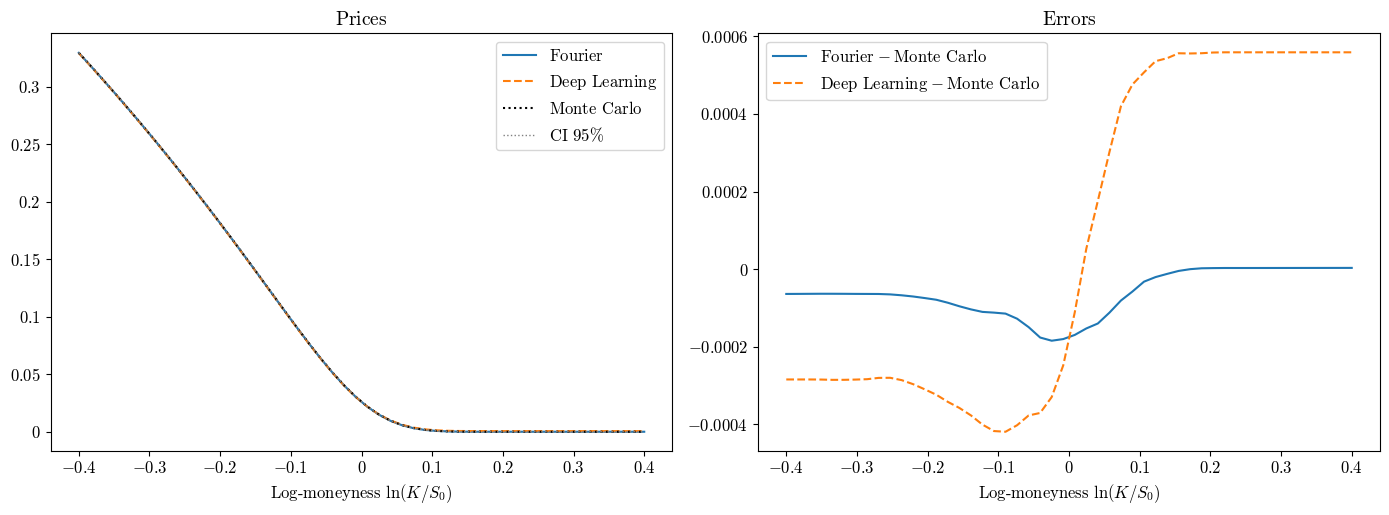

In [17]:
plot_prices(lm_range, prices_mid_01, prices_lower_01, prices_upper_01, prices_fourier_01, prices_dl_01)

#### I.2. $T = 0.5$

In [25]:
T = 0.5
S_05, V_05 = simulate_rough_heston(M, n, T, S0, V0, kappa, theta, nu, rho, H, N_vals)

In [26]:
model_05 = SolveRoughHestonBSDE(T, S0, V0, kappa, theta, nu, rho, H, n_displaystep = 1)
model_05.train()

  1%|▍                                          | 1/100 [00:01<01:59,  1.21s/it]

Step 0, Loss: 0.543714


  2%|▊                                          | 2/100 [00:02<02:29,  1.53s/it]

Step 1, Loss: 0.300603


  3%|█▎                                         | 3/100 [00:04<02:43,  1.69s/it]

Step 2, Loss: 0.216451


  4%|█▋                                         | 4/100 [00:06<02:45,  1.72s/it]

Step 3, Loss: 0.169321


  5%|██▏                                        | 5/100 [00:08<02:45,  1.74s/it]

Step 4, Loss: 0.131792


  6%|██▌                                        | 6/100 [00:10<02:45,  1.76s/it]

Step 5, Loss: 0.103830


  7%|███                                        | 7/100 [00:11<02:43,  1.76s/it]

Step 6, Loss: 0.062385


  8%|███▍                                       | 8/100 [00:13<02:40,  1.74s/it]

Step 7, Loss: 0.044021


  9%|███▊                                       | 9/100 [00:15<02:28,  1.63s/it]

Step 8, Loss: 0.054268


 10%|████▏                                     | 10/100 [00:15<01:59,  1.32s/it]

Step 9, Loss: 0.048496


 11%|████▌                                     | 11/100 [00:16<01:45,  1.18s/it]

Step 10, Loss: 0.044487


 12%|█████                                     | 12/100 [00:17<01:34,  1.08s/it]

Step 11, Loss: 0.039721


 13%|█████▍                                    | 13/100 [00:18<01:22,  1.06it/s]

Step 12, Loss: 0.034999


 14%|█████▉                                    | 14/100 [00:18<01:15,  1.14it/s]

Step 13, Loss: 0.026392


 15%|██████▎                                   | 15/100 [00:19<01:15,  1.12it/s]

Step 14, Loss: 0.023556


 16%|██████▋                                   | 16/100 [00:20<01:07,  1.24it/s]

Step 15, Loss: 0.021448


 17%|███████▏                                  | 17/100 [00:20<01:03,  1.31it/s]

Step 16, Loss: 0.020123


 18%|███████▌                                  | 18/100 [00:21<00:58,  1.39it/s]

Step 17, Loss: 0.021046


 19%|███████▉                                  | 19/100 [00:22<00:55,  1.47it/s]

Step 18, Loss: 0.021903


 20%|████████▍                                 | 20/100 [00:22<00:52,  1.53it/s]

Step 19, Loss: 0.023262
Switching : Adam -> SGD


 21%|████████▊                                 | 21/100 [00:23<00:49,  1.58it/s]

Step 20, Loss: 0.016580


 22%|█████████▏                                | 22/100 [00:23<00:49,  1.58it/s]

Step 21, Loss: 0.017574


 23%|█████████▋                                | 23/100 [00:24<00:47,  1.62it/s]

Step 22, Loss: 0.014582


 24%|██████████                                | 24/100 [00:25<00:48,  1.55it/s]

Step 23, Loss: 0.013294


 25%|██████████▌                               | 25/100 [00:25<00:48,  1.56it/s]

Step 24, Loss: 0.011673


 26%|██████████▉                               | 26/100 [00:26<00:46,  1.58it/s]

Step 25, Loss: 0.011243


 27%|███████████▎                              | 27/100 [00:27<00:46,  1.57it/s]

Step 26, Loss: 0.011414


 28%|███████████▊                              | 28/100 [00:27<00:45,  1.57it/s]

Step 27, Loss: 0.010285


 29%|████████████▏                             | 29/100 [00:28<00:44,  1.60it/s]

Step 28, Loss: 0.011548


 30%|████████████▌                             | 30/100 [00:28<00:43,  1.61it/s]

Step 29, Loss: 0.012284


 31%|█████████████                             | 31/100 [00:29<00:43,  1.57it/s]

Step 30, Loss: 0.012152


 32%|█████████████▍                            | 32/100 [00:30<00:43,  1.56it/s]

Step 31, Loss: 0.012594


 33%|█████████████▊                            | 33/100 [00:30<00:42,  1.57it/s]

Step 32, Loss: 0.011211


 34%|██████████████▎                           | 34/100 [00:31<00:44,  1.50it/s]

Step 33, Loss: 0.010876


 35%|██████████████▋                           | 35/100 [00:32<00:42,  1.54it/s]

Step 34, Loss: 0.010666


 36%|███████████████                           | 36/100 [00:32<00:40,  1.57it/s]

Step 35, Loss: 0.010749


 37%|███████████████▌                          | 37/100 [00:33<00:39,  1.61it/s]

Step 36, Loss: 0.009744


 38%|███████████████▉                          | 38/100 [00:34<00:38,  1.61it/s]

Step 37, Loss: 0.008796


 39%|████████████████▍                         | 39/100 [00:34<00:38,  1.60it/s]

Step 38, Loss: 0.010164


 40%|████████████████▊                         | 40/100 [00:35<00:37,  1.60it/s]

Step 39, Loss: 0.009650


 41%|█████████████████▏                        | 41/100 [00:35<00:36,  1.60it/s]

Step 40, Loss: 0.008896


 42%|█████████████████▋                        | 42/100 [00:36<00:36,  1.60it/s]

Step 41, Loss: 0.009054


 43%|██████████████████                        | 43/100 [00:37<00:35,  1.59it/s]

Step 42, Loss: 0.008447


 44%|██████████████████▍                       | 44/100 [00:37<00:35,  1.57it/s]

Step 43, Loss: 0.008247


 45%|██████████████████▉                       | 45/100 [00:38<00:34,  1.58it/s]

Step 44, Loss: 0.007989


 46%|███████████████████▎                      | 46/100 [00:39<00:34,  1.59it/s]

Step 45, Loss: 0.008540


 47%|███████████████████▋                      | 47/100 [00:39<00:33,  1.59it/s]

Step 46, Loss: 0.007812


 48%|████████████████████▏                     | 48/100 [00:40<00:32,  1.61it/s]

Step 47, Loss: 0.008380


 49%|████████████████████▌                     | 49/100 [00:40<00:31,  1.62it/s]

Step 48, Loss: 0.008501


 50%|█████████████████████                     | 50/100 [00:41<00:30,  1.62it/s]

Step 49, Loss: 0.008452


 51%|█████████████████████▍                    | 51/100 [00:42<00:30,  1.62it/s]

Step 50, Loss: 0.007780


 52%|█████████████████████▊                    | 52/100 [00:42<00:29,  1.62it/s]

Step 51, Loss: 0.007021


 53%|██████████████████████▎                   | 53/100 [00:43<00:29,  1.62it/s]

Step 52, Loss: 0.007446


 54%|██████████████████████▋                   | 54/100 [00:44<00:28,  1.64it/s]

Step 53, Loss: 0.007157


 55%|███████████████████████                   | 55/100 [00:44<00:27,  1.64it/s]

Step 54, Loss: 0.007546


 56%|███████████████████████▌                  | 56/100 [00:45<00:27,  1.62it/s]

Step 55, Loss: 0.007128


 57%|███████████████████████▉                  | 57/100 [00:45<00:27,  1.57it/s]

Step 56, Loss: 0.006845


 58%|████████████████████████▎                 | 58/100 [00:46<00:26,  1.58it/s]

Step 57, Loss: 0.008802


 59%|████████████████████████▊                 | 59/100 [00:47<00:25,  1.58it/s]

Step 58, Loss: 0.007770


 60%|█████████████████████████▏                | 60/100 [00:47<00:25,  1.60it/s]

Step 59, Loss: 0.007535


 61%|█████████████████████████▌                | 61/100 [00:48<00:24,  1.60it/s]

Step 60, Loss: 0.007267


 62%|██████████████████████████                | 62/100 [00:49<00:23,  1.60it/s]

Step 61, Loss: 0.007027


 63%|██████████████████████████▍               | 63/100 [00:49<00:23,  1.59it/s]

Step 62, Loss: 0.008156


 64%|██████████████████████████▉               | 64/100 [00:50<00:22,  1.61it/s]

Step 63, Loss: 0.007822


 65%|███████████████████████████▎              | 65/100 [00:50<00:21,  1.61it/s]

Step 64, Loss: 0.007751


 66%|███████████████████████████▋              | 66/100 [00:51<00:21,  1.61it/s]

Step 65, Loss: 0.006355


 67%|████████████████████████████▏             | 67/100 [00:52<00:20,  1.60it/s]

Step 66, Loss: 0.007353


 68%|████████████████████████████▌             | 68/100 [00:52<00:19,  1.61it/s]

Step 67, Loss: 0.006576


 69%|████████████████████████████▉             | 69/100 [00:53<00:19,  1.60it/s]

Step 68, Loss: 0.007104


 70%|█████████████████████████████▍            | 70/100 [00:54<00:18,  1.60it/s]

Step 69, Loss: 0.006910


 71%|█████████████████████████████▊            | 71/100 [00:54<00:18,  1.61it/s]

Step 70, Loss: 0.007027


 72%|██████████████████████████████▏           | 72/100 [00:55<00:17,  1.61it/s]

Step 71, Loss: 0.007080


 73%|██████████████████████████████▋           | 73/100 [00:55<00:16,  1.61it/s]

Step 72, Loss: 0.006891


 74%|███████████████████████████████           | 74/100 [00:56<00:15,  1.63it/s]

Step 73, Loss: 0.006916


 75%|███████████████████████████████▌          | 75/100 [00:57<00:15,  1.63it/s]

Step 74, Loss: 0.006791


 76%|███████████████████████████████▉          | 76/100 [00:57<00:14,  1.62it/s]

Step 75, Loss: 0.007611


 77%|████████████████████████████████▎         | 77/100 [00:58<00:14,  1.58it/s]

Step 76, Loss: 0.006657


 78%|████████████████████████████████▊         | 78/100 [00:59<00:13,  1.59it/s]

Step 77, Loss: 0.006756


 79%|█████████████████████████████████▏        | 79/100 [00:59<00:13,  1.61it/s]

Step 78, Loss: 0.006980


 80%|█████████████████████████████████▌        | 80/100 [01:00<00:12,  1.62it/s]

Step 79, Loss: 0.007145


 81%|██████████████████████████████████        | 81/100 [01:00<00:11,  1.61it/s]

Step 80, Loss: 0.007422


 82%|██████████████████████████████████▍       | 82/100 [01:01<00:11,  1.58it/s]

Step 81, Loss: 0.007012


 83%|██████████████████████████████████▊       | 83/100 [01:02<00:11,  1.45it/s]

Step 82, Loss: 0.006273


 84%|███████████████████████████████████▎      | 84/100 [01:02<00:10,  1.52it/s]

Step 83, Loss: 0.006638


 85%|███████████████████████████████████▋      | 85/100 [01:03<00:09,  1.55it/s]

Step 84, Loss: 0.006608


 86%|████████████████████████████████████      | 86/100 [01:04<00:09,  1.50it/s]

Step 85, Loss: 0.006919


 87%|████████████████████████████████████▌     | 87/100 [01:04<00:08,  1.52it/s]

Step 86, Loss: 0.006712


 88%|████████████████████████████████████▉     | 88/100 [01:05<00:07,  1.58it/s]

Step 87, Loss: 0.006229


 89%|█████████████████████████████████████▍    | 89/100 [01:06<00:06,  1.60it/s]

Step 88, Loss: 0.006928


 90%|█████████████████████████████████████▊    | 90/100 [01:06<00:06,  1.62it/s]

Step 89, Loss: 0.007465


 91%|██████████████████████████████████████▏   | 91/100 [01:07<00:05,  1.62it/s]

Step 90, Loss: 0.006067


 92%|██████████████████████████████████████▋   | 92/100 [01:07<00:04,  1.63it/s]

Step 91, Loss: 0.006795


 93%|███████████████████████████████████████   | 93/100 [01:08<00:04,  1.57it/s]

Step 92, Loss: 0.006346


 94%|███████████████████████████████████████▍  | 94/100 [01:09<00:03,  1.59it/s]

Step 93, Loss: 0.005995


 95%|███████████████████████████████████████▉  | 95/100 [01:09<00:03,  1.60it/s]

Step 94, Loss: 0.006167


 96%|████████████████████████████████████████▎ | 96/100 [01:10<00:02,  1.60it/s]

Step 95, Loss: 0.006799


 97%|████████████████████████████████████████▋ | 97/100 [01:11<00:01,  1.61it/s]

Step 96, Loss: 0.006282


 98%|█████████████████████████████████████████▏| 98/100 [01:11<00:01,  1.62it/s]

Step 97, Loss: 0.006743


 99%|█████████████████████████████████████████▌| 99/100 [01:12<00:00,  1.61it/s]

Step 98, Loss: 0.006673


100%|█████████████████████████████████████████| 100/100 [01:12<00:00,  1.37it/s]

Step 99, Loss: 0.006375
Training ends in 72.977 seconds


In [27]:
prices_dl_05 = model_05.get_prices(K_values, verbose=True) 

100%|██████████████████████████████████████████| 50/50 [00:00<00:00, 158.48it/s]


In [28]:
prices_mid_05, prices_lower_05, prices_upper_05 = compute_prices_europ_MC(S_05[:, -1], K_values, flag="call")

In [29]:
L = 50 
phi = compute_phi(T, n, alpha, V0, kappa, theta, nu, rho, L) 
prices_fourier_05 = compute_prices_europ_Fourier(phi, S0, K_values, flag="call")

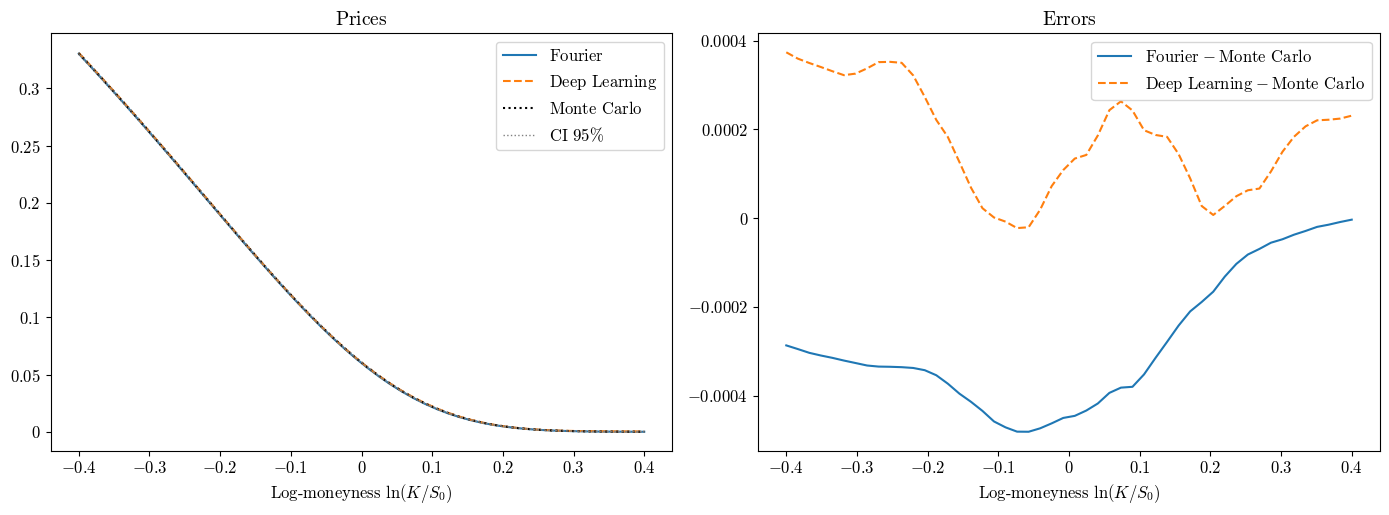

In [30]:
plot_prices(lm_range, prices_mid_05, prices_lower_05, prices_upper_05, prices_fourier_05, prices_dl_05)

#### I.3. $T = 1.6$

In [39]:
T = 1.6
S_16, V_16 = simulate_rough_heston(M, n, T, S0, V0, kappa, theta, nu, rho, H, N_vals)

In [40]:
model_16 = SolveRoughHestonBSDE(T, S0, V0, kappa, theta, nu, rho, H, n_displaystep = 1)
model_16.train()

  1%|▍                                          | 1/100 [00:01<02:06,  1.28s/it]

Step 0, Loss: 3.207923


  2%|▊                                          | 2/100 [00:02<01:53,  1.16s/it]

Step 1, Loss: 1.752827


  3%|█▎                                         | 3/100 [00:03<01:50,  1.14s/it]

Step 2, Loss: 0.869885


  4%|█▋                                         | 4/100 [00:05<02:06,  1.32s/it]

Step 3, Loss: 0.451113


  5%|██▏                                        | 5/100 [00:06<02:02,  1.29s/it]

Step 4, Loss: 0.383841


  6%|██▌                                        | 6/100 [00:07<02:02,  1.31s/it]

Step 5, Loss: 0.396258


  7%|███                                        | 7/100 [00:09<02:11,  1.41s/it]

Step 6, Loss: 0.380245


  8%|███▍                                       | 8/100 [00:10<01:56,  1.27s/it]

Step 7, Loss: 0.344308


  9%|███▊                                       | 9/100 [00:11<01:49,  1.21s/it]

Step 8, Loss: 0.271021


 10%|████▏                                     | 10/100 [00:11<01:32,  1.02s/it]

Step 9, Loss: 0.230384


 11%|████▌                                     | 11/100 [00:12<01:19,  1.12it/s]

Step 10, Loss: 0.195464


 12%|█████                                     | 12/100 [00:13<01:11,  1.23it/s]

Step 11, Loss: 0.141662


 13%|█████▍                                    | 13/100 [00:13<01:05,  1.32it/s]

Step 12, Loss: 0.121977


 14%|█████▉                                    | 14/100 [00:14<01:02,  1.38it/s]

Step 13, Loss: 0.109674


 15%|██████▎                                   | 15/100 [00:15<00:58,  1.45it/s]

Step 14, Loss: 0.108927


 16%|██████▋                                   | 16/100 [00:15<00:56,  1.50it/s]

Step 15, Loss: 0.137828


 17%|███████▏                                  | 17/100 [00:16<00:53,  1.54it/s]

Step 16, Loss: 0.118405


 18%|███████▌                                  | 18/100 [00:16<00:52,  1.57it/s]

Step 17, Loss: 0.121274


 19%|███████▉                                  | 19/100 [00:17<00:51,  1.56it/s]

Step 18, Loss: 0.119268


 20%|████████▍                                 | 20/100 [00:18<00:51,  1.55it/s]

Step 19, Loss: 0.091037
Switching : Adam -> SGD


 21%|████████▊                                 | 21/100 [00:18<00:53,  1.49it/s]

Step 20, Loss: 0.068934


 22%|█████████▏                                | 22/100 [00:19<00:51,  1.52it/s]

Step 21, Loss: 0.062386


 23%|█████████▋                                | 23/100 [00:20<00:58,  1.32it/s]

Step 22, Loss: 0.052086


 24%|██████████                                | 24/100 [00:21<00:54,  1.38it/s]

Step 23, Loss: 0.045571


 25%|██████████▌                               | 25/100 [00:21<00:51,  1.45it/s]

Step 24, Loss: 0.042987


 26%|██████████▉                               | 26/100 [00:22<00:50,  1.47it/s]

Step 25, Loss: 0.041810


 27%|███████████▎                              | 27/100 [00:23<00:47,  1.52it/s]

Step 26, Loss: 0.048248


 28%|███████████▊                              | 28/100 [00:23<00:46,  1.56it/s]

Step 27, Loss: 0.039237


 29%|████████████▏                             | 29/100 [00:24<00:44,  1.58it/s]

Step 28, Loss: 0.043739


 30%|████████████▌                             | 30/100 [00:24<00:43,  1.60it/s]

Step 29, Loss: 0.038148


 31%|█████████████                             | 31/100 [00:25<00:43,  1.60it/s]

Step 30, Loss: 0.036801


 32%|█████████████▍                            | 32/100 [00:26<00:44,  1.53it/s]

Step 31, Loss: 0.041902


 33%|█████████████▊                            | 33/100 [00:26<00:42,  1.57it/s]

Step 32, Loss: 0.035031


 34%|██████████████▎                           | 34/100 [00:27<00:42,  1.57it/s]

Step 33, Loss: 0.033677


 35%|██████████████▋                           | 35/100 [00:28<00:40,  1.60it/s]

Step 34, Loss: 0.031456


 36%|███████████████                           | 36/100 [00:28<00:40,  1.59it/s]

Step 35, Loss: 0.028520


 37%|███████████████▌                          | 37/100 [00:29<00:39,  1.60it/s]

Step 36, Loss: 0.028580


 38%|███████████████▉                          | 38/100 [00:29<00:38,  1.61it/s]

Step 37, Loss: 0.035161


 39%|████████████████▍                         | 39/100 [00:30<00:37,  1.62it/s]

Step 38, Loss: 0.030785


 40%|████████████████▊                         | 40/100 [00:31<00:39,  1.50it/s]

Step 39, Loss: 0.027178


 41%|█████████████████▏                        | 41/100 [00:31<00:39,  1.50it/s]

Step 40, Loss: 0.031084


 42%|█████████████████▋                        | 42/100 [00:32<00:37,  1.54it/s]

Step 41, Loss: 0.032257


 43%|██████████████████                        | 43/100 [00:33<00:35,  1.59it/s]

Step 42, Loss: 0.028939


 44%|██████████████████▍                       | 44/100 [00:33<00:37,  1.49it/s]

Step 43, Loss: 0.027952


 45%|██████████████████▉                       | 45/100 [00:34<00:35,  1.53it/s]

Step 44, Loss: 0.028339


 46%|███████████████████▎                      | 46/100 [00:35<00:38,  1.41it/s]

Step 45, Loss: 0.026976


 47%|███████████████████▋                      | 47/100 [00:36<00:40,  1.29it/s]

Step 46, Loss: 0.029050


 48%|████████████████████▏                     | 48/100 [00:36<00:37,  1.37it/s]

Step 47, Loss: 0.025947


 49%|████████████████████▌                     | 49/100 [00:37<00:35,  1.43it/s]

Step 48, Loss: 0.023084


 50%|█████████████████████                     | 50/100 [00:38<00:35,  1.39it/s]

Step 49, Loss: 0.027411


 51%|█████████████████████▍                    | 51/100 [00:38<00:33,  1.47it/s]

Step 50, Loss: 0.023972


 52%|█████████████████████▊                    | 52/100 [00:39<00:34,  1.40it/s]

Step 51, Loss: 0.027528


 53%|██████████████████████▎                   | 53/100 [00:40<00:34,  1.38it/s]

Step 52, Loss: 0.027534


 54%|██████████████████████▋                   | 54/100 [00:41<00:33,  1.37it/s]

Step 53, Loss: 0.025431


 55%|███████████████████████                   | 55/100 [00:41<00:31,  1.45it/s]

Step 54, Loss: 0.027680


 56%|███████████████████████▌                  | 56/100 [00:42<00:29,  1.48it/s]

Step 55, Loss: 0.030902


 57%|███████████████████████▉                  | 57/100 [00:43<00:28,  1.53it/s]

Step 56, Loss: 0.025612


 58%|████████████████████████▎                 | 58/100 [00:43<00:27,  1.54it/s]

Step 57, Loss: 0.023103


 59%|████████████████████████▊                 | 59/100 [00:44<00:27,  1.50it/s]

Step 58, Loss: 0.029279


 60%|█████████████████████████▏                | 60/100 [00:45<00:34,  1.17it/s]

Step 59, Loss: 0.020987


 61%|█████████████████████████▌                | 61/100 [00:46<00:30,  1.28it/s]

Step 60, Loss: 0.022345


 62%|██████████████████████████                | 62/100 [00:46<00:28,  1.33it/s]

Step 61, Loss: 0.023109


 63%|██████████████████████████▍               | 63/100 [00:47<00:26,  1.40it/s]

Step 62, Loss: 0.023477


 64%|██████████████████████████▉               | 64/100 [00:48<00:25,  1.42it/s]

Step 63, Loss: 0.022262


 65%|███████████████████████████▎              | 65/100 [00:48<00:23,  1.48it/s]

Step 64, Loss: 0.022430


 66%|███████████████████████████▋              | 66/100 [00:49<00:22,  1.52it/s]

Step 65, Loss: 0.025106


 67%|████████████████████████████▏             | 67/100 [00:50<00:21,  1.55it/s]

Step 66, Loss: 0.023099


 68%|████████████████████████████▌             | 68/100 [00:50<00:20,  1.58it/s]

Step 67, Loss: 0.022111


 69%|████████████████████████████▉             | 69/100 [00:51<00:19,  1.59it/s]

Step 68, Loss: 0.020634


 70%|█████████████████████████████▍            | 70/100 [00:51<00:19,  1.57it/s]

Step 69, Loss: 0.021393


 71%|█████████████████████████████▊            | 71/100 [00:52<00:19,  1.51it/s]

Step 70, Loss: 0.022276


 72%|██████████████████████████████▏           | 72/100 [00:53<00:18,  1.55it/s]

Step 71, Loss: 0.026854


 73%|██████████████████████████████▋           | 73/100 [00:53<00:17,  1.55it/s]

Step 72, Loss: 0.021247


 74%|███████████████████████████████           | 74/100 [00:54<00:16,  1.58it/s]

Step 73, Loss: 0.025129


 75%|███████████████████████████████▌          | 75/100 [00:55<00:15,  1.59it/s]

Step 74, Loss: 0.022337


 76%|███████████████████████████████▉          | 76/100 [00:55<00:15,  1.59it/s]

Step 75, Loss: 0.022430


 77%|████████████████████████████████▎         | 77/100 [00:56<00:14,  1.57it/s]

Step 76, Loss: 0.024189


 78%|████████████████████████████████▊         | 78/100 [00:57<00:13,  1.59it/s]

Step 77, Loss: 0.022923


 79%|█████████████████████████████████▏        | 79/100 [00:57<00:14,  1.46it/s]

Step 78, Loss: 0.021625


 80%|█████████████████████████████████▌        | 80/100 [00:58<00:14,  1.34it/s]

Step 79, Loss: 0.021802


 81%|██████████████████████████████████        | 81/100 [00:59<00:13,  1.38it/s]

Step 80, Loss: 0.022021


 82%|██████████████████████████████████▍       | 82/100 [01:00<00:12,  1.44it/s]

Step 81, Loss: 0.025438


 83%|██████████████████████████████████▊       | 83/100 [01:00<00:11,  1.50it/s]

Step 82, Loss: 0.022051


 84%|███████████████████████████████████▎      | 84/100 [01:01<00:11,  1.39it/s]

Step 83, Loss: 0.022656


 85%|███████████████████████████████████▋      | 85/100 [01:02<00:10,  1.37it/s]

Step 84, Loss: 0.021875


 86%|████████████████████████████████████      | 86/100 [01:02<00:09,  1.45it/s]

Step 85, Loss: 0.025648


 87%|████████████████████████████████████▌     | 87/100 [01:03<00:08,  1.49it/s]

Step 86, Loss: 0.022791


 88%|████████████████████████████████████▉     | 88/100 [01:04<00:08,  1.49it/s]

Step 87, Loss: 0.023084


 89%|█████████████████████████████████████▍    | 89/100 [01:04<00:07,  1.52it/s]

Step 88, Loss: 0.022303


 90%|█████████████████████████████████████▊    | 90/100 [01:05<00:06,  1.55it/s]

Step 89, Loss: 0.024083


 91%|██████████████████████████████████████▏   | 91/100 [01:06<00:05,  1.56it/s]

Step 90, Loss: 0.018953


 92%|██████████████████████████████████████▋   | 92/100 [01:06<00:05,  1.54it/s]

Step 91, Loss: 0.021390


 93%|███████████████████████████████████████   | 93/100 [01:07<00:04,  1.55it/s]

Step 92, Loss: 0.019848


 94%|███████████████████████████████████████▍  | 94/100 [01:08<00:03,  1.50it/s]

Step 93, Loss: 0.020461


 95%|███████████████████████████████████████▉  | 95/100 [01:08<00:03,  1.36it/s]

Step 94, Loss: 0.020448


 96%|████████████████████████████████████████▎ | 96/100 [01:09<00:02,  1.42it/s]

Step 95, Loss: 0.020189


 97%|████████████████████████████████████████▋ | 97/100 [01:10<00:02,  1.39it/s]

Step 96, Loss: 0.020645


 98%|█████████████████████████████████████████▏| 98/100 [01:10<00:01,  1.46it/s]

Step 97, Loss: 0.021038


 99%|█████████████████████████████████████████▌| 99/100 [01:11<00:00,  1.50it/s]

Step 98, Loss: 0.018939


100%|█████████████████████████████████████████| 100/100 [01:12<00:00,  1.39it/s]

Step 99, Loss: 0.022672
Training ends in 72.159 seconds


In [41]:
prices_dl_16 = model_16.get_prices(K_values, verbose=True) 

100%|██████████████████████████████████████████| 50/50 [00:00<00:00, 252.98it/s]


In [42]:
prices_mid_16, prices_lower_16, prices_upper_16 = compute_prices_europ_MC(S_16[:, -1], K_values, flag="call")

In [43]:
L = 50
phi = compute_phi(T, n, alpha, V0, kappa, theta, nu, rho, L) 
prices_fourier_16 = compute_prices_europ_Fourier(phi, S0, K_values, flag="call")

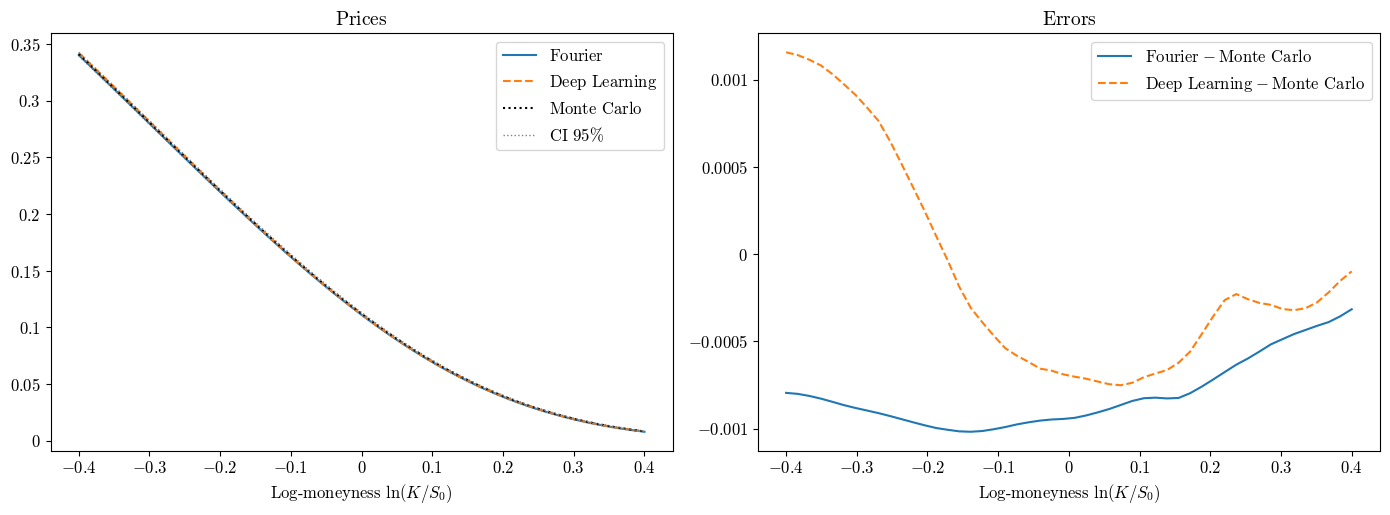

In [44]:
plot_prices(lm_range, prices_mid_16, prices_lower_16, prices_upper_16, prices_fourier_16, prices_dl_16)

#### I.4. $T=5$

In [51]:
T = 5
S_5, V_5 = simulate_rough_heston(M, n, T, S0, V0, kappa, theta, nu, rho, H, N_vals)

In [73]:
model_5 = SolveRoughHestonBSDE(T, S0, V0, kappa, theta, nu, rho, H, n_displaystep = 1)
model_5.train()

  1%|▍                                          | 1/100 [00:01<01:40,  1.02s/it]

Step 0, Loss: 18.439930


  2%|▊                                          | 2/100 [00:02<01:41,  1.03s/it]

Step 1, Loss: 11.536400


  3%|█▎                                         | 3/100 [00:03<01:38,  1.01s/it]

Step 2, Loss: 6.499254


  4%|█▋                                         | 4/100 [00:04<01:36,  1.00s/it]

Step 3, Loss: 2.890961


  5%|██▏                                        | 5/100 [00:05<01:35,  1.00s/it]

Step 4, Loss: 2.280457


  6%|██▌                                        | 6/100 [00:06<01:34,  1.00s/it]

Step 5, Loss: 2.500887


  7%|███                                        | 7/100 [00:07<01:33,  1.01s/it]

Step 6, Loss: 2.521842


  8%|███▍                                       | 8/100 [00:08<01:31,  1.01it/s]

Step 7, Loss: 2.438743


  9%|███▊                                       | 9/100 [00:08<01:28,  1.02it/s]

Step 8, Loss: 2.246703


 10%|████▏                                     | 10/100 [00:09<01:29,  1.01it/s]

Step 9, Loss: 2.092102


 11%|████▌                                     | 11/100 [00:10<01:26,  1.03it/s]

Step 10, Loss: 1.504358


 12%|█████                                     | 12/100 [00:11<01:24,  1.05it/s]

Step 11, Loss: 1.416766


 13%|█████▍                                    | 13/100 [00:12<01:23,  1.04it/s]

Step 12, Loss: 1.224522


 14%|█████▉                                    | 14/100 [00:13<01:22,  1.04it/s]

Step 13, Loss: 0.956172


 15%|██████▎                                   | 15/100 [00:14<01:20,  1.05it/s]

Step 14, Loss: 0.755322


 16%|██████▋                                   | 16/100 [00:15<01:20,  1.04it/s]

Step 15, Loss: 0.705102


 17%|███████▏                                  | 17/100 [00:16<01:18,  1.06it/s]

Step 16, Loss: 0.694681


 18%|███████▌                                  | 18/100 [00:17<01:18,  1.05it/s]

Step 17, Loss: 0.587789


 19%|███████▉                                  | 19/100 [00:18<01:17,  1.04it/s]

Step 18, Loss: 0.536757


 20%|████████▍                                 | 20/100 [00:19<01:17,  1.04it/s]

Step 19, Loss: 0.531942
Switching : Adam -> SGD


 21%|████████▊                                 | 21/100 [00:20<01:16,  1.04it/s]

Step 20, Loss: 0.451550


 22%|█████████▏                                | 22/100 [00:21<01:14,  1.04it/s]

Step 21, Loss: 0.238806


 23%|█████████▋                                | 23/100 [00:22<01:13,  1.05it/s]

Step 22, Loss: 0.268066


 24%|██████████                                | 24/100 [00:23<01:13,  1.03it/s]

Step 23, Loss: 0.339711


 25%|██████████▌                               | 25/100 [00:24<01:12,  1.03it/s]

Step 24, Loss: 0.225370


 26%|██████████▉                               | 26/100 [00:25<01:11,  1.04it/s]

Step 25, Loss: 0.273914


 27%|███████████▎                              | 27/100 [00:26<01:09,  1.05it/s]

Step 26, Loss: 0.185838


 28%|███████████▊                              | 28/100 [00:27<01:09,  1.04it/s]

Step 27, Loss: 0.204930


 29%|████████████▏                             | 29/100 [00:28<01:08,  1.04it/s]

Step 28, Loss: 0.229035


 30%|████████████▌                             | 30/100 [00:29<01:07,  1.03it/s]

Step 29, Loss: 0.175526


 31%|█████████████                             | 31/100 [00:30<01:07,  1.03it/s]

Step 30, Loss: 0.153686


 32%|█████████████▍                            | 32/100 [00:31<01:05,  1.04it/s]

Step 31, Loss: 0.187010


 33%|█████████████▊                            | 33/100 [00:31<01:03,  1.05it/s]

Step 32, Loss: 0.167276


 34%|██████████████▎                           | 34/100 [00:32<01:02,  1.06it/s]

Step 33, Loss: 0.153739


 35%|██████████████▋                           | 35/100 [00:33<01:02,  1.04it/s]

Step 34, Loss: 0.134251


 36%|███████████████                           | 36/100 [00:34<01:02,  1.02it/s]

Step 35, Loss: 0.145452


 37%|███████████████▌                          | 37/100 [00:35<01:00,  1.04it/s]

Step 36, Loss: 0.131036


 38%|███████████████▉                          | 38/100 [00:36<00:59,  1.04it/s]

Step 37, Loss: 0.141324


 39%|████████████████▍                         | 39/100 [00:37<00:59,  1.03it/s]

Step 38, Loss: 0.128711


 40%|████████████████▊                         | 40/100 [00:38<00:57,  1.05it/s]

Step 39, Loss: 0.114599


 41%|█████████████████▏                        | 41/100 [00:39<00:56,  1.05it/s]

Step 40, Loss: 0.118336


 42%|█████████████████▋                        | 42/100 [00:40<00:54,  1.06it/s]

Step 41, Loss: 0.137270


 43%|██████████████████                        | 43/100 [00:41<00:53,  1.07it/s]

Step 42, Loss: 0.117291


 44%|██████████████████▍                       | 44/100 [00:42<00:52,  1.07it/s]

Step 43, Loss: 0.113263


 45%|██████████████████▉                       | 45/100 [00:43<00:51,  1.07it/s]

Step 44, Loss: 0.102845


 46%|███████████████████▎                      | 46/100 [00:44<00:50,  1.07it/s]

Step 45, Loss: 0.111905


 47%|███████████████████▋                      | 47/100 [00:45<00:50,  1.05it/s]

Step 46, Loss: 0.108815


 48%|████████████████████▏                     | 48/100 [00:46<00:49,  1.06it/s]

Step 47, Loss: 0.117295


 49%|████████████████████▌                     | 49/100 [00:47<00:48,  1.05it/s]

Step 48, Loss: 0.107598


 50%|█████████████████████                     | 50/100 [00:48<00:48,  1.04it/s]

Step 49, Loss: 0.108909


 51%|█████████████████████▍                    | 51/100 [00:49<00:46,  1.05it/s]

Step 50, Loss: 0.096020


 52%|█████████████████████▊                    | 52/100 [00:50<00:47,  1.01it/s]

Step 51, Loss: 0.110212


 53%|██████████████████████▎                   | 53/100 [00:51<00:46,  1.02it/s]

Step 52, Loss: 0.121126


 54%|██████████████████████▋                   | 54/100 [00:52<00:46,  1.02s/it]

Step 53, Loss: 0.111288


 55%|███████████████████████                   | 55/100 [00:53<00:46,  1.04s/it]

Step 54, Loss: 0.105354


 56%|███████████████████████▌                  | 56/100 [00:54<00:45,  1.03s/it]

Step 55, Loss: 0.091208


 57%|███████████████████████▉                  | 57/100 [00:55<00:43,  1.01s/it]

Step 56, Loss: 0.102320


 58%|████████████████████████▎                 | 58/100 [00:56<00:42,  1.01s/it]

Step 57, Loss: 0.105569


 59%|████████████████████████▊                 | 59/100 [00:57<00:41,  1.00s/it]

Step 58, Loss: 0.092381


 60%|█████████████████████████▏                | 60/100 [00:58<00:39,  1.00it/s]

Step 59, Loss: 0.104150


 61%|█████████████████████████▌                | 61/100 [00:59<00:38,  1.00it/s]

Step 60, Loss: 0.093026


 62%|██████████████████████████                | 62/100 [01:00<00:37,  1.01it/s]

Step 61, Loss: 0.097664


 63%|██████████████████████████▍               | 63/100 [01:01<00:36,  1.01it/s]

Step 62, Loss: 0.101979


 64%|██████████████████████████▉               | 64/100 [01:02<00:35,  1.02it/s]

Step 63, Loss: 0.087792


 65%|███████████████████████████▎              | 65/100 [01:03<00:34,  1.02it/s]

Step 64, Loss: 0.104638


 66%|███████████████████████████▋              | 66/100 [01:04<00:34,  1.00s/it]

Step 65, Loss: 0.093651


 67%|████████████████████████████▏             | 67/100 [01:05<00:32,  1.01it/s]

Step 66, Loss: 0.098667


 68%|████████████████████████████▌             | 68/100 [01:06<00:33,  1.04s/it]

Step 67, Loss: 0.105222


 69%|████████████████████████████▉             | 69/100 [01:07<00:32,  1.03s/it]

Step 68, Loss: 0.088324


 70%|█████████████████████████████▍            | 70/100 [01:08<00:30,  1.02s/it]

Step 69, Loss: 0.094216


 71%|█████████████████████████████▊            | 71/100 [01:09<00:30,  1.05s/it]

Step 70, Loss: 0.097687


 72%|██████████████████████████████▏           | 72/100 [01:11<00:34,  1.22s/it]

Step 71, Loss: 0.103647


 73%|██████████████████████████████▋           | 73/100 [01:12<00:31,  1.17s/it]

Step 72, Loss: 0.087736


 74%|███████████████████████████████           | 74/100 [01:13<00:28,  1.11s/it]

Step 73, Loss: 0.086383


 75%|███████████████████████████████▌          | 75/100 [01:14<00:27,  1.09s/it]

Step 74, Loss: 0.080103


 76%|███████████████████████████████▉          | 76/100 [01:15<00:25,  1.07s/it]

Step 75, Loss: 0.094659


 77%|████████████████████████████████▎         | 77/100 [01:16<00:23,  1.04s/it]

Step 76, Loss: 0.084551


 78%|████████████████████████████████▊         | 78/100 [01:17<00:22,  1.04s/it]

Step 77, Loss: 0.091408


 79%|█████████████████████████████████▏        | 79/100 [01:18<00:21,  1.03s/it]

Step 78, Loss: 0.094310


 80%|█████████████████████████████████▌        | 80/100 [01:19<00:20,  1.00s/it]

Step 79, Loss: 0.077048


 81%|██████████████████████████████████        | 81/100 [01:20<00:18,  1.02it/s]

Step 80, Loss: 0.088273


 82%|██████████████████████████████████▍       | 82/100 [01:21<00:17,  1.03it/s]

Step 81, Loss: 0.098108


 83%|██████████████████████████████████▊       | 83/100 [01:22<00:17,  1.00s/it]

Step 82, Loss: 0.087654


 84%|███████████████████████████████████▎      | 84/100 [01:23<00:16,  1.00s/it]

Step 83, Loss: 0.083695


 85%|███████████████████████████████████▋      | 85/100 [01:24<00:15,  1.00s/it]

Step 84, Loss: 0.092908


 86%|████████████████████████████████████      | 86/100 [01:25<00:13,  1.02it/s]

Step 85, Loss: 0.091664


 87%|████████████████████████████████████▌     | 87/100 [01:26<00:12,  1.02it/s]

Step 86, Loss: 0.082779


 88%|████████████████████████████████████▉     | 88/100 [01:27<00:11,  1.01it/s]

Step 87, Loss: 0.090157


 89%|█████████████████████████████████████▍    | 89/100 [01:28<00:10,  1.00it/s]

Step 88, Loss: 0.093092


 90%|█████████████████████████████████████▊    | 90/100 [01:29<00:09,  1.02it/s]

Step 89, Loss: 0.095841


 91%|██████████████████████████████████████▏   | 91/100 [01:30<00:08,  1.03it/s]

Step 90, Loss: 0.092605


 92%|██████████████████████████████████████▋   | 92/100 [01:30<00:07,  1.03it/s]

Step 91, Loss: 0.093061


 93%|███████████████████████████████████████   | 93/100 [01:31<00:06,  1.03it/s]

Step 92, Loss: 0.096994


 94%|███████████████████████████████████████▍  | 94/100 [01:32<00:05,  1.04it/s]

Step 93, Loss: 0.081294


 95%|███████████████████████████████████████▉  | 95/100 [01:33<00:04,  1.04it/s]

Step 94, Loss: 0.088318


 96%|████████████████████████████████████████▎ | 96/100 [01:34<00:03,  1.04it/s]

Step 95, Loss: 0.091434


 97%|████████████████████████████████████████▋ | 97/100 [01:35<00:02,  1.03it/s]

Step 96, Loss: 0.078502


 98%|█████████████████████████████████████████▏| 98/100 [01:36<00:01,  1.01it/s]

Step 97, Loss: 0.099331


 99%|█████████████████████████████████████████▌| 99/100 [01:37<00:01,  1.00s/it]

Step 98, Loss: 0.087890


100%|█████████████████████████████████████████| 100/100 [01:38<00:00,  1.01it/s]

Step 99, Loss: 0.087078
Training ends in 98.886 seconds


In [76]:
prices_dl_5 = model_5.get_prices(K_values, verbose=True) 

100%|██████████████████████████████████████████| 50/50 [00:00<00:00, 244.08it/s]


In [78]:
prices_mid_5, prices_lower_5, prices_upper_5 = compute_prices_europ_MC(S_5[:, -1], K_values, flag="call")

In [80]:
L = 50
phi = compute_phi(T, n, alpha, V0, kappa, theta, nu, rho, L) 
prices_fourier_5 = compute_prices_europ_Fourier(phi, S0, K_values, flag="call")

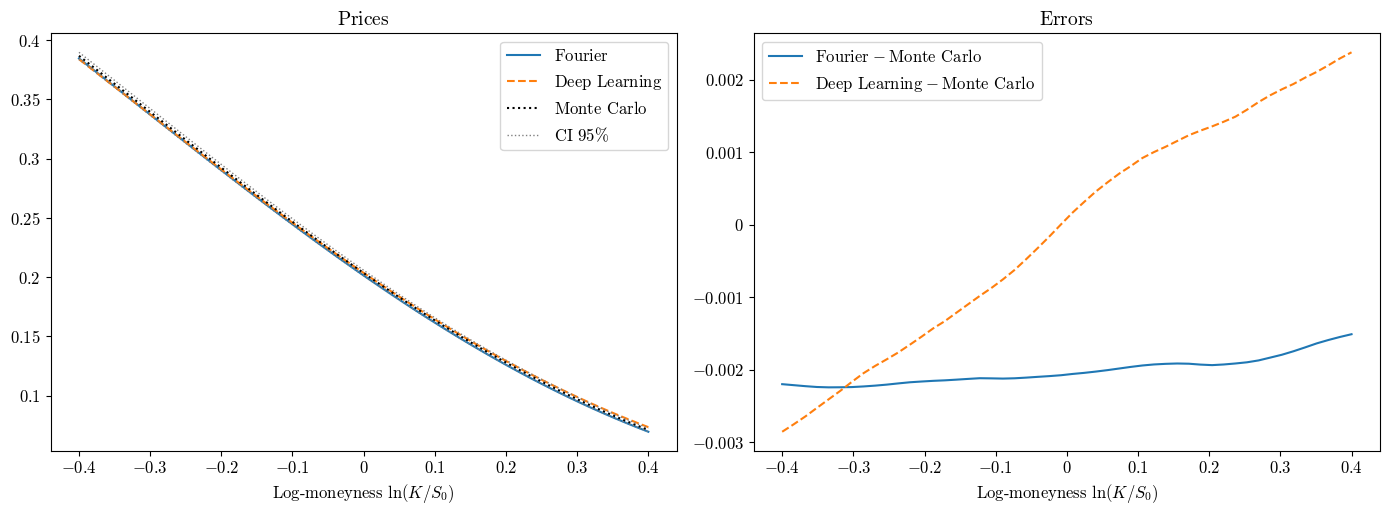

In [82]:
plot_prices(lm_range, prices_mid_5, prices_lower_5, prices_upper_5, prices_fourier_5, prices_dl_5)

#### I.5. Join plot 

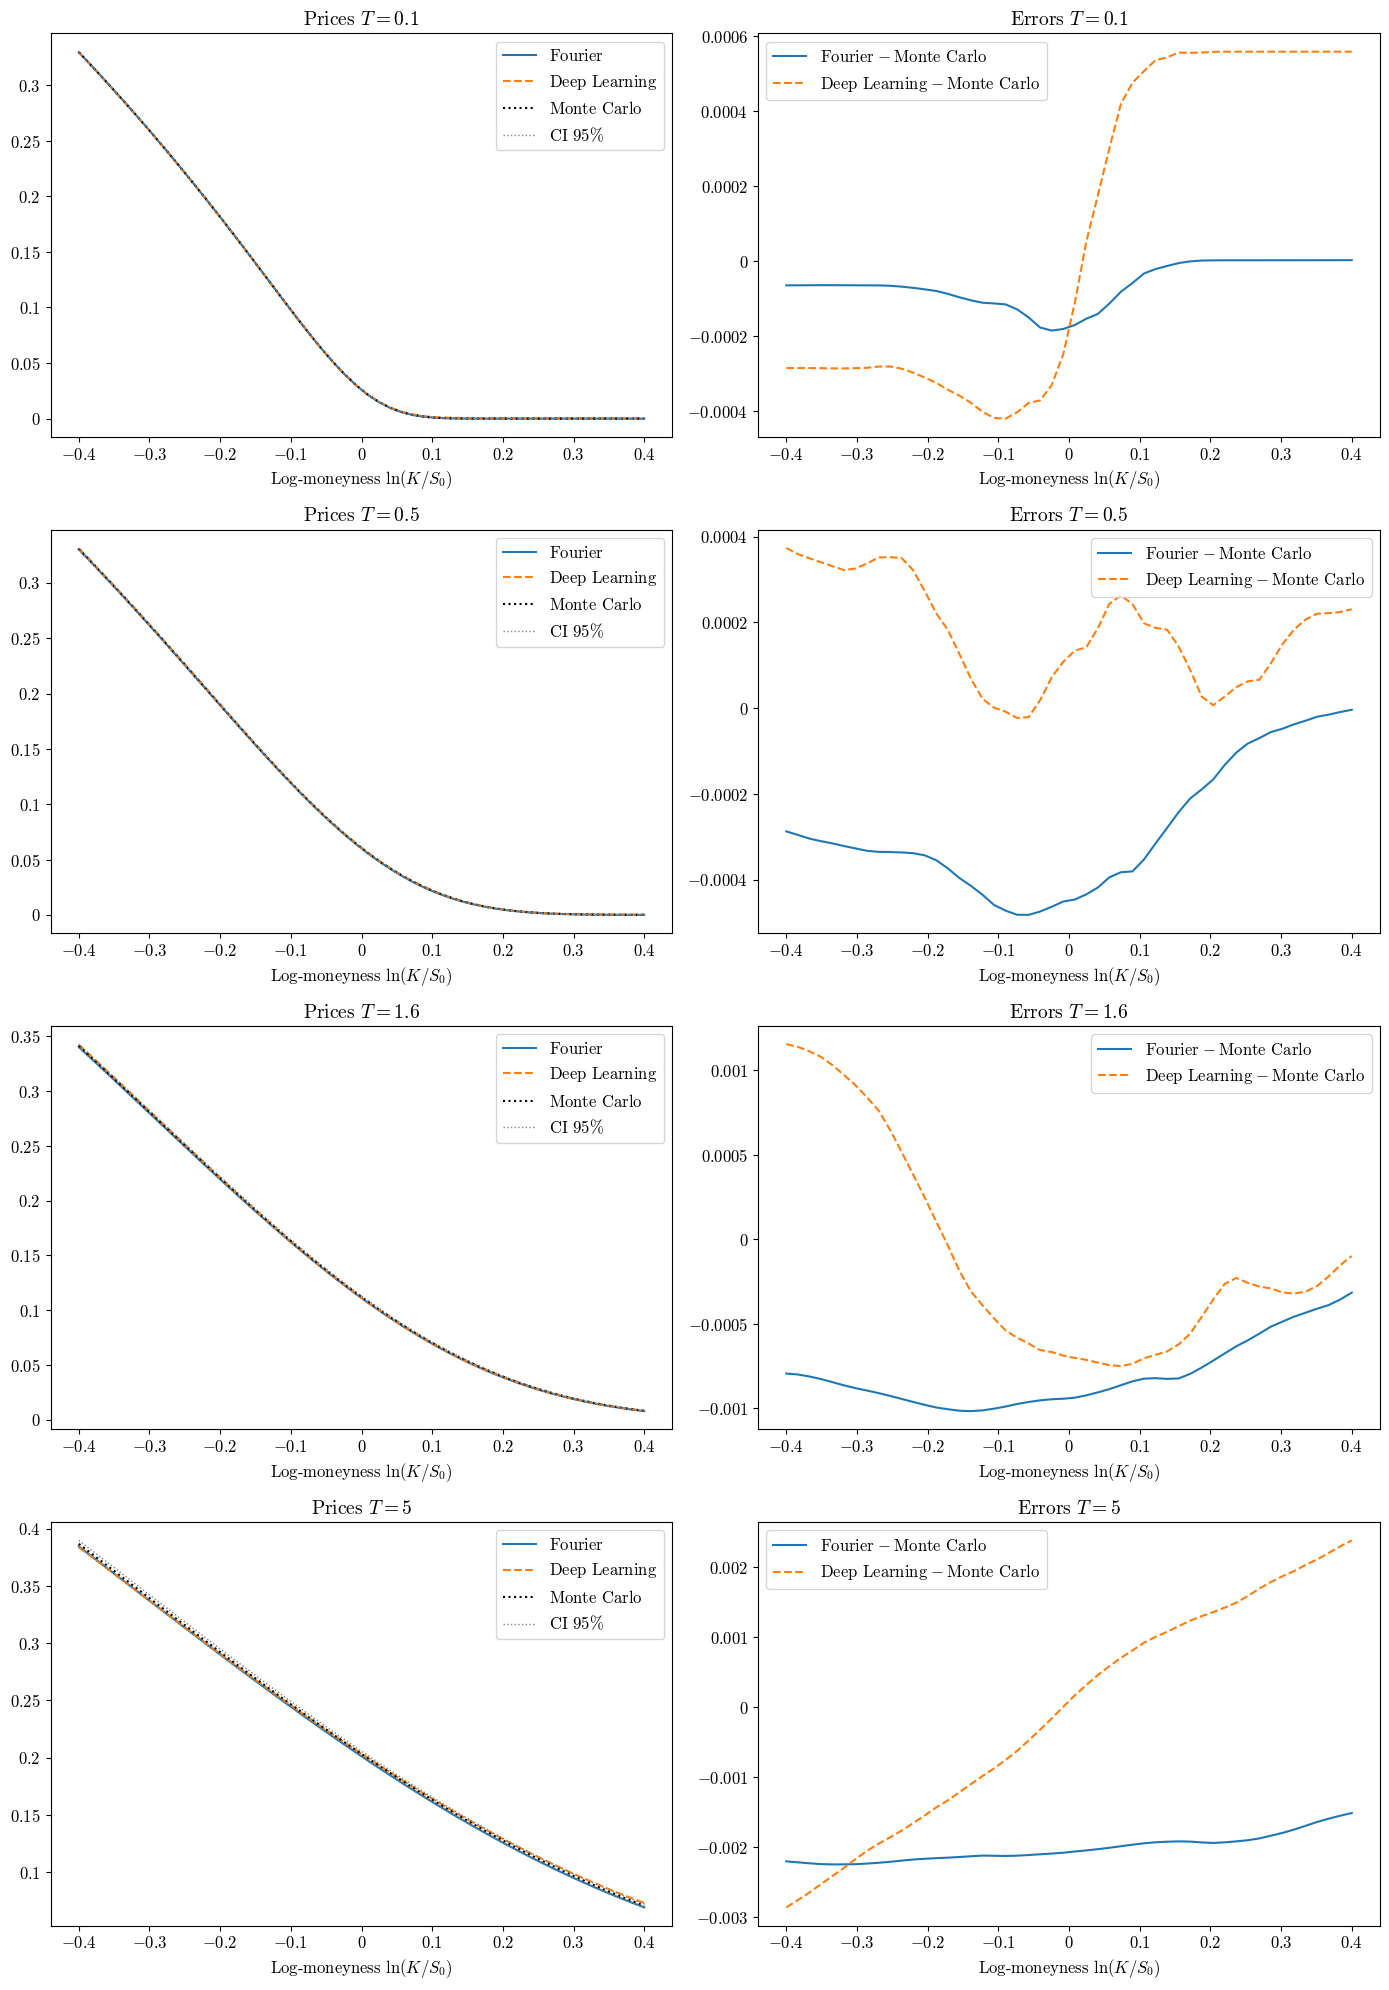

In [85]:
plot_all_prices(lm_range, prices_mid_01, prices_lower_01, prices_upper_01, prices_fourier_01, prices_dl_01,
                   prices_mid_05, prices_lower_05, prices_upper_05, prices_fourier_05, prices_dl_05,
                   prices_mid_16, prices_lower_16, prices_upper_16, prices_fourier_16, prices_dl_16,
                   prices_mid_5, prices_lower_5, prices_upper_5, prices_fourier_5, prices_dl_5)

#### I.6. Loss 

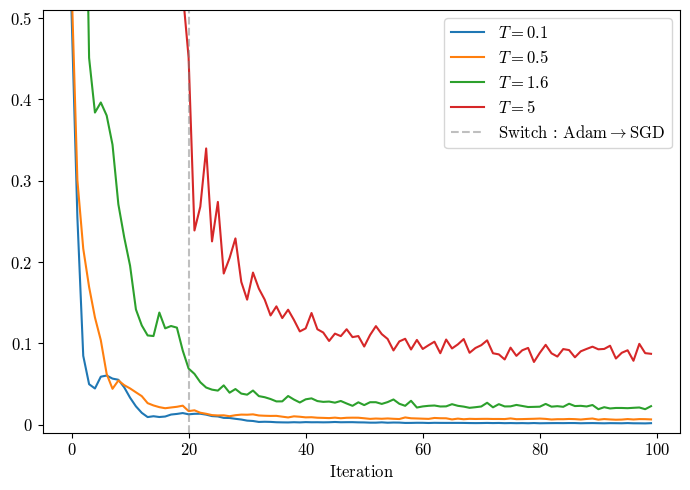

In [141]:
plot_loss_training(model_01, model_05, model_16, model_5) 

### II. Implied volatility smiles 

In [160]:
S0, V0, r = 1, 0.04, 0.0
kappa, theta, nu, rho = 1.0, 0.06, 0.9, -0.8

H = 0.1
alpha = H+0.5
n = 252
M = 100000

In [470]:
N_vals = simulate_antithetic(M, n, d=3)

In [471]:
lm_range = np.linspace(-0.25, 0.25, 20)
K_values = S0 * np.exp(lm_range)

#### II.1. $T =0.2$

|          | $\text{Config ID}$ | $\text{Number of networks }(m)$ | $\text{Neurons}$ | $\text{Layers}$ |
|----------|--------------------|---------------------------------|------------------|-----------------|
|          | $1$                | $5$                             | $6$              | $4$
|          | $2$                | $3$                             | $10$             | $2$ 
|          | $3$                | $3$                             | $6$              | $6$
|          | $4$                | $2$                             | $6$              | $4$

In [476]:
T = 0.2

In [478]:
S_02, V_02 = simulate_rough_heston(M, n, T, S0, V0, kappa, theta, nu, rho, H, N_vals)

In [480]:
prices_mc_02, prices_lower_02, prices_upper_02 = compute_prices_europ_MC(S_02[:, -1], K_values, flag="call")

In [482]:
L = 41
phi = compute_phi(T, n, alpha, V0, kappa, theta, nu, rho, L) 
prices_fourier_02 = compute_prices_europ_Fourier(phi, S0, K_values, flag="call")

In [485]:
iv_mc_02 = compute_IV(prices_mc_02, S0, K_values, T)
iv_lower_02 = compute_IV(prices_lower_02, S0, K_values, T)
iv_upper_02 = compute_IV(prices_upper_02, S0, K_values, T)
iv_fourier_02 = compute_IV(prices_fourier_02, S0, K_values, T)

##### II.1.1. Config 1 

In [404]:
model_02_config_1 = SolveRoughHestonBSDE(T, S0, V0, kappa, theta, nu, rho, H, 
                                        m=5, hidden_dim=6, num_hidden_layers=4)
model_02_config_1.train()

  1%|▍                                          | 1/100 [00:00<00:58,  1.70it/s]

Step 0, Loss: 0.268220


 11%|████▌                                     | 11/100 [00:06<00:52,  1.69it/s]

Step 10, Loss: 0.010640


 20%|████████▍                                 | 20/100 [00:12<00:49,  1.60it/s]

Switching : Adam -> SGD


 21%|████████▊                                 | 21/100 [00:12<00:49,  1.59it/s]

Step 20, Loss: 0.005041


 31%|█████████████                             | 31/100 [00:19<00:42,  1.63it/s]

Step 30, Loss: 0.003362


 41%|█████████████████▏                        | 41/100 [00:26<00:39,  1.48it/s]

Step 40, Loss: 0.002817


 51%|█████████████████████▍                    | 51/100 [00:32<00:30,  1.60it/s]

Step 50, Loss: 0.002445


 61%|█████████████████████████▌                | 61/100 [00:38<00:23,  1.63it/s]

Step 60, Loss: 0.001977


 71%|█████████████████████████████▊            | 71/100 [00:45<00:23,  1.23it/s]

Step 70, Loss: 0.001847


 81%|██████████████████████████████████        | 81/100 [00:52<00:12,  1.52it/s]

Step 80, Loss: 0.001860


 91%|██████████████████████████████████████▏   | 91/100 [00:58<00:05,  1.64it/s]

Step 90, Loss: 0.001564


100%|█████████████████████████████████████████| 100/100 [01:04<00:00,  1.54it/s]

Training ends in 64.906 seconds


In [406]:
prices_02_config_1 = model_02_config_1.get_prices(K_values, verbose=True) 

100%|██████████████████████████████████████████| 20/20 [00:00<00:00, 155.10it/s]


In [410]:
iv_02_config_1 = compute_IV(prices_02_config_1, S0, K_values, T)

##### II.1.2. Config 2

In [421]:
model_02_config_2 = SolveRoughHestonBSDE(T, S0, V0, kappa, theta, nu, rho, H, 
                                        m=3, hidden_dim=10, num_hidden_layers=2)
model_02_config_2.train()

  1%|▍                                          | 1/100 [00:00<01:06,  1.49it/s]

Step 0, Loss: 0.343869


 11%|████▌                                     | 11/100 [00:06<00:54,  1.64it/s]

Step 10, Loss: 0.007609


 20%|████████▍                                 | 20/100 [00:12<00:48,  1.66it/s]

Switching : Adam -> SGD


 21%|████████▊                                 | 21/100 [00:12<00:47,  1.65it/s]

Step 20, Loss: 0.004238


 31%|█████████████                             | 31/100 [00:19<00:42,  1.63it/s]

Step 30, Loss: 0.003282


 41%|█████████████████▏                        | 41/100 [00:25<00:36,  1.62it/s]

Step 40, Loss: 0.002788


 51%|█████████████████████▍                    | 51/100 [00:31<00:29,  1.67it/s]

Step 50, Loss: 0.001967


 61%|█████████████████████████▌                | 61/100 [00:37<00:23,  1.66it/s]

Step 60, Loss: 0.001762


 71%|█████████████████████████████▊            | 71/100 [00:44<00:17,  1.64it/s]

Step 70, Loss: 0.001912


 81%|██████████████████████████████████        | 81/100 [00:50<00:12,  1.48it/s]

Step 80, Loss: 0.001553


 91%|██████████████████████████████████████▏   | 91/100 [00:57<00:06,  1.47it/s]

Step 90, Loss: 0.001791


100%|█████████████████████████████████████████| 100/100 [01:03<00:00,  1.58it/s]

Training ends in 63.106 seconds


In [423]:
prices_02_config_2 = model_02_config_2.get_prices(K_values, verbose=True) 

100%|██████████████████████████████████████████| 20/20 [00:00<00:00, 430.44it/s]


In [424]:
iv_02_config_2 = compute_IV(prices_02_config_2, S0, K_values, T)

##### II.1.3. Config 3

In [432]:
model_02_config_3 = SolveRoughHestonBSDE(T, S0, V0, kappa, theta, nu, rho, H, 
                                        m=3, hidden_dim=6, num_hidden_layers=6)
model_02_config_3.train()

  1%|▍                                          | 1/100 [00:00<00:58,  1.69it/s]

Step 0, Loss: 0.781002


 11%|████▌                                     | 11/100 [00:06<00:56,  1.58it/s]

Step 10, Loss: 0.021557


 20%|████████▍                                 | 20/100 [00:12<00:49,  1.63it/s]

Switching : Adam -> SGD


 21%|████████▊                                 | 21/100 [00:13<01:02,  1.25it/s]

Step 20, Loss: 0.009976


 31%|█████████████                             | 31/100 [00:19<00:43,  1.60it/s]

Step 30, Loss: 0.002763


 41%|█████████████████▏                        | 41/100 [00:25<00:36,  1.61it/s]

Step 40, Loss: 0.002644


 51%|█████████████████████▍                    | 51/100 [00:32<00:30,  1.63it/s]

Step 50, Loss: 0.002034


 61%|█████████████████████████▌                | 61/100 [00:38<00:24,  1.62it/s]

Step 60, Loss: 0.002156


 71%|█████████████████████████████▊            | 71/100 [00:44<00:18,  1.60it/s]

Step 70, Loss: 0.001762


 81%|██████████████████████████████████        | 81/100 [00:50<00:11,  1.62it/s]

Step 80, Loss: 0.001980


 91%|██████████████████████████████████████▏   | 91/100 [00:57<00:05,  1.62it/s]

Step 90, Loss: 0.001557


100%|█████████████████████████████████████████| 100/100 [01:02<00:00,  1.59it/s]

Training ends in 62.796 seconds


In [434]:
prices_02_config_3 = model_02_config_3.get_prices(K_values, verbose=True) 

100%|██████████████████████████████████████████| 20/20 [00:00<00:00, 144.42it/s]


In [435]:
iv_02_config_3 = compute_IV(prices_02_config_3, S0, K_values, T)

##### II.1.4. Config 4 

In [437]:
model_02_config_4 = SolveRoughHestonBSDE(T, S0, V0, kappa, theta, nu, rho, H, 
                                        m=2, hidden_dim=6, num_hidden_layers=4)
model_02_config_4.train()

  1%|▍                                          | 1/100 [00:00<00:58,  1.68it/s]

Step 0, Loss: 0.160700


 11%|████▌                                     | 11/100 [00:06<00:55,  1.60it/s]

Step 10, Loss: 0.009840


 20%|████████▍                                 | 20/100 [00:12<00:51,  1.56it/s]

Switching : Adam -> SGD


 21%|████████▊                                 | 21/100 [00:12<00:49,  1.60it/s]

Step 20, Loss: 0.002680


 31%|█████████████                             | 31/100 [00:19<00:41,  1.67it/s]

Step 30, Loss: 0.001495


 41%|█████████████████▏                        | 41/100 [00:25<00:35,  1.64it/s]

Step 40, Loss: 0.001774


 51%|█████████████████████▍                    | 51/100 [00:31<00:29,  1.66it/s]

Step 50, Loss: 0.001420


 61%|█████████████████████████▌                | 61/100 [00:37<00:23,  1.67it/s]

Step 60, Loss: 0.001345


 71%|█████████████████████████████▊            | 71/100 [00:43<00:18,  1.59it/s]

Step 70, Loss: 0.001210


 81%|██████████████████████████████████        | 81/100 [00:49<00:11,  1.64it/s]

Step 80, Loss: 0.001266


 91%|██████████████████████████████████████▏   | 91/100 [00:55<00:05,  1.61it/s]

Step 90, Loss: 0.001195


100%|█████████████████████████████████████████| 100/100 [01:01<00:00,  1.63it/s]

Training ends in 61.298 seconds


In [438]:
prices_02_config_4 = model_02_config_4.get_prices(K_values, verbose=True) 

100%|██████████████████████████████████████████| 20/20 [00:00<00:00, 395.80it/s]


In [439]:
iv_02_config_4 = compute_IV(prices_02_config_4, S0, K_values, T)

##### II.1.5. Plot

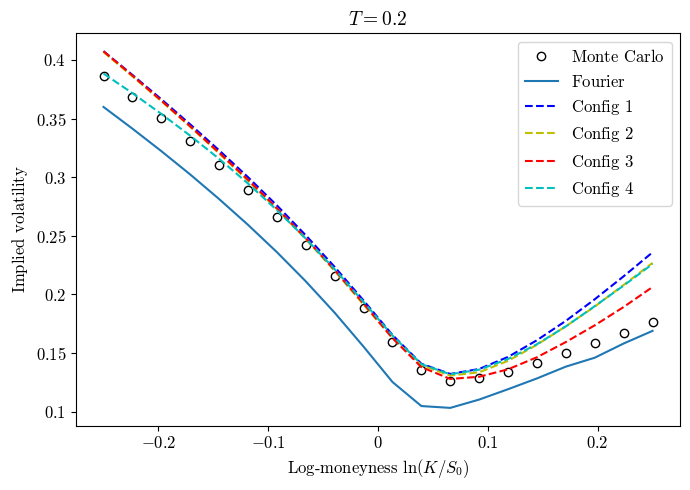

In [532]:
plot_IV(lm_range, iv_mc_02, iv_fourier_02, iv_02_config_1, iv_02_config_2, iv_02_config_3, iv_02_config_4, T)

#### II.2. $T =0.6$

|          | $\text{Config ID}$ | $\text{Number of networks }(m)$ | $\text{Neurons}$ | $\text{Layers}$ |
|----------|--------------------|---------------------------------|------------------|-----------------|
|          | $1$                | $4$                             | $6$              | $4$
|          | $2$                | $4$                             | $3$              | $2$ 
|          | $3$                | $2$                             | $3$              | $4$
|          | $4$                | $4$                             | $10$             | $4$

In [534]:
T = 0.6

In [536]:
S_06, V_06 = simulate_rough_heston(M, n, T, S0, V0, kappa, theta, nu, rho, H, N_vals)

In [537]:
prices_mc_06, prices_lower_06, prices_upper_06 = compute_prices_europ_MC(S_06[:, -1], K_values, flag="call")

In [620]:
L = 20
phi = compute_phi(T, n, alpha, V0, kappa, theta, nu, rho, L) 
prices_fourier_06 = compute_prices_europ_Fourier(phi, S0, K_values, flag="call")

In [622]:
iv_mc_06 = compute_IV(prices_mc_06, S0, K_values, T)
iv_lower_06 = compute_IV(prices_lower_06, S0, K_values, T)
iv_upper_06 = compute_IV(prices_upper_06, S0, K_values, T)
iv_fourier_06 = compute_IV(prices_fourier_06, S0, K_values, T)

In [624]:
iv_fourier_06

array([0.28250089, 0.27037704, 0.25803225, 0.24522916, 0.23192292,
       0.218226  , 0.20395773, 0.18902034, 0.17356587, 0.15751173,
       0.14107836, 0.12587908, 0.11433309, 0.10816608, 0.10750911,
       0.11046714, 0.11512441, 0.12128905, 0.12831725, 0.13607366])

##### II.2.1. Config 1

In [574]:
model_06_config_1 = SolveRoughHestonBSDE(T, S0, V0, kappa, theta, nu, rho, H, 
                                        m=4, hidden_dim=6, num_hidden_layers=4)
model_06_config_1.train()

  1%|▍                                          | 1/100 [00:00<01:01,  1.60it/s]

Step 0, Loss: 1.134988


 11%|████▌                                     | 11/100 [00:07<00:56,  1.57it/s]

Step 10, Loss: 0.044004


 20%|████████▍                                 | 20/100 [00:12<00:49,  1.62it/s]

Switching : Adam -> SGD


 21%|████████▊                                 | 21/100 [00:13<00:49,  1.61it/s]

Step 20, Loss: 0.017294


 31%|█████████████                             | 31/100 [00:19<00:42,  1.63it/s]

Step 30, Loss: 0.010323


 41%|█████████████████▏                        | 41/100 [00:25<00:35,  1.66it/s]

Step 40, Loss: 0.007795


 51%|█████████████████████▍                    | 51/100 [00:31<00:31,  1.55it/s]

Step 50, Loss: 0.005538


 61%|█████████████████████████▌                | 61/100 [00:38<00:24,  1.57it/s]

Step 60, Loss: 0.004741


 71%|█████████████████████████████▊            | 71/100 [00:45<00:22,  1.27it/s]

Step 70, Loss: 0.006398


 81%|██████████████████████████████████        | 81/100 [00:51<00:12,  1.57it/s]

Step 80, Loss: 0.005276


 91%|██████████████████████████████████████▏   | 91/100 [00:57<00:05,  1.62it/s]

Step 90, Loss: 0.004484


100%|█████████████████████████████████████████| 100/100 [01:03<00:00,  1.57it/s]

Training ends in 63.516 seconds


In [576]:
prices_06_config_1 = model_06_config_1.get_prices(K_values, verbose=True) 

100%|██████████████████████████████████████████| 20/20 [00:00<00:00, 190.87it/s]


In [577]:
iv_06_config_1 = compute_IV(prices_06_config_1, S0, K_values, T)

##### II.2.2. Config 2

In [579]:
model_06_config_2 = SolveRoughHestonBSDE(T, S0, V0, kappa, theta, nu, rho, H, 
                                        m=4, hidden_dim=3, num_hidden_layers=2)
model_06_config_2.train()

  1%|▍                                          | 1/100 [00:00<01:00,  1.64it/s]

Step 0, Loss: 0.823321


 11%|████▌                                     | 11/100 [00:06<00:54,  1.64it/s]

Step 10, Loss: 0.066012


 20%|████████▍                                 | 20/100 [00:12<00:48,  1.65it/s]

Switching : Adam -> SGD


 21%|████████▊                                 | 21/100 [00:12<00:47,  1.65it/s]

Step 20, Loss: 0.020404


 31%|█████████████                             | 31/100 [00:18<00:41,  1.66it/s]

Step 30, Loss: 0.015883


 41%|█████████████████▏                        | 41/100 [00:24<00:35,  1.66it/s]

Step 40, Loss: 0.010858


 51%|█████████████████████▍                    | 51/100 [00:31<00:30,  1.63it/s]

Step 50, Loss: 0.009074


 61%|█████████████████████████▌                | 61/100 [00:37<00:24,  1.62it/s]

Step 60, Loss: 0.007225


 71%|█████████████████████████████▊            | 71/100 [00:43<00:18,  1.60it/s]

Step 70, Loss: 0.005931


 81%|██████████████████████████████████        | 81/100 [00:50<00:14,  1.36it/s]

Step 80, Loss: 0.005439


 91%|██████████████████████████████████████▏   | 91/100 [00:57<00:06,  1.33it/s]

Step 90, Loss: 0.005561


100%|█████████████████████████████████████████| 100/100 [01:03<00:00,  1.58it/s]

Training ends in 63.481 seconds


In [580]:
prices_06_config_2 = model_06_config_2.get_prices(K_values, verbose=True) 

100%|██████████████████████████████████████████| 20/20 [00:00<00:00, 344.31it/s]


In [581]:
iv_06_config_2 = compute_IV(prices_06_config_2, S0, K_values, T)

##### II.2.3. Config 3

In [587]:
model_06_config_3 = SolveRoughHestonBSDE(T, S0, V0, kappa, theta, nu, rho, H, 
                                        m=2, hidden_dim=3, num_hidden_layers=4)
model_06_config_3.train()

  1%|▍                                          | 1/100 [00:00<01:02,  1.59it/s]

Step 0, Loss: 0.543786


 11%|████▌                                     | 11/100 [00:06<00:53,  1.65it/s]

Step 10, Loss: 0.062314


 20%|████████▍                                 | 20/100 [00:12<00:47,  1.67it/s]

Switching : Adam -> SGD


 21%|████████▊                                 | 21/100 [00:12<00:47,  1.67it/s]

Step 20, Loss: 0.009648


 31%|█████████████                             | 31/100 [00:18<00:41,  1.66it/s]

Step 30, Loss: 0.005240


 41%|█████████████████▏                        | 41/100 [00:25<00:38,  1.54it/s]

Step 40, Loss: 0.004166


 51%|█████████████████████▍                    | 51/100 [00:34<00:40,  1.21it/s]

Step 50, Loss: 0.003650


 61%|█████████████████████████▌                | 61/100 [00:41<00:27,  1.41it/s]

Step 60, Loss: 0.003919


 71%|█████████████████████████████▊            | 71/100 [00:48<00:21,  1.35it/s]

Step 70, Loss: 0.004015


 81%|██████████████████████████████████        | 81/100 [00:55<00:13,  1.46it/s]

Step 80, Loss: 0.003651


 91%|██████████████████████████████████████▏   | 91/100 [01:02<00:06,  1.44it/s]

Step 90, Loss: 0.003754


100%|█████████████████████████████████████████| 100/100 [01:08<00:00,  1.45it/s]

Training ends in 68.894 seconds


In [588]:
prices_06_config_3 = model_06_config_3.get_prices(K_values, verbose=True) 

100%|██████████████████████████████████████████| 20/20 [00:00<00:00, 377.07it/s]


In [589]:
iv_06_config_3 = compute_IV(prices_06_config_3, S0, K_values, T)

##### II.2.4. Config 4

In [591]:
model_06_config_4 = SolveRoughHestonBSDE(T, S0, V0, kappa, theta, nu, rho, H, 
                                        m=4, hidden_dim=10, num_hidden_layers=4)
model_06_config_4.train()

  1%|▍                                          | 1/100 [00:00<00:59,  1.67it/s]

Step 0, Loss: 1.503811


 11%|████▌                                     | 11/100 [00:06<00:55,  1.60it/s]

Step 10, Loss: 0.089230


 20%|████████▍                                 | 20/100 [00:12<00:49,  1.61it/s]

Switching : Adam -> SGD


 21%|████████▊                                 | 21/100 [00:13<00:48,  1.62it/s]

Step 20, Loss: 0.016303


 31%|█████████████                             | 31/100 [00:19<00:42,  1.61it/s]

Step 30, Loss: 0.007873


 41%|█████████████████▏                        | 41/100 [00:25<00:38,  1.52it/s]

Step 40, Loss: 0.006164


 51%|█████████████████████▍                    | 51/100 [00:33<00:34,  1.43it/s]

Step 50, Loss: 0.005725


 61%|█████████████████████████▌                | 61/100 [00:39<00:24,  1.61it/s]

Step 60, Loss: 0.004597


 71%|█████████████████████████████▊            | 71/100 [00:45<00:17,  1.63it/s]

Step 70, Loss: 0.005440


 81%|██████████████████████████████████        | 81/100 [00:51<00:11,  1.59it/s]

Step 80, Loss: 0.005254


 91%|██████████████████████████████████████▏   | 91/100 [00:58<00:05,  1.58it/s]

Step 90, Loss: 0.004630


100%|█████████████████████████████████████████| 100/100 [01:04<00:00,  1.56it/s]

Training ends in 64.211 seconds


In [592]:
prices_06_config_4 = model_06_config_4.get_prices(K_values, verbose=True) 

100%|██████████████████████████████████████████| 20/20 [00:00<00:00, 170.15it/s]


In [593]:
iv_06_config_4 = compute_IV(prices_06_config_4, S0, K_values, T)

##### II.2.5. Plot

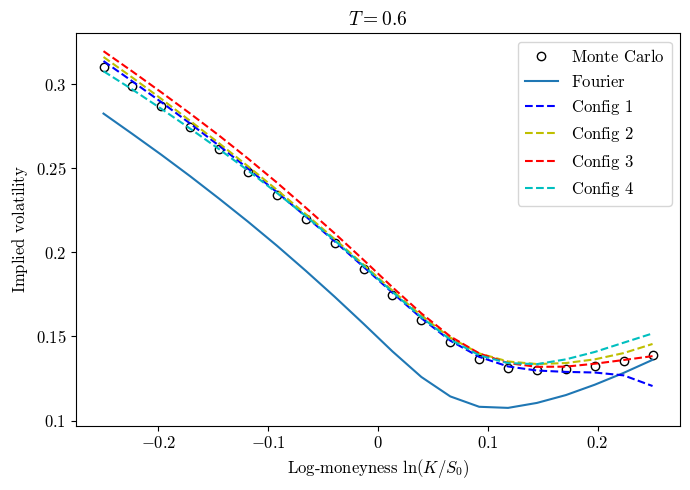

In [626]:
plot_IV(lm_range, iv_mc_06, iv_fourier_06, iv_06_config_1, iv_06_config_2, iv_06_config_3, iv_06_config_4, T)

#### II.3. Joint plot 

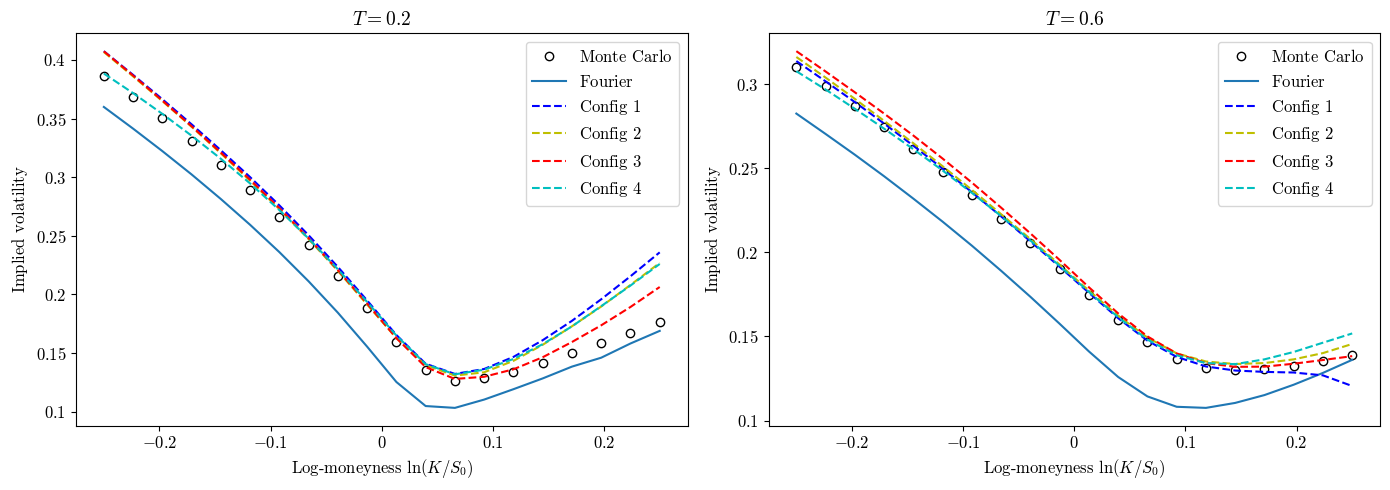

In [644]:
plot_joint_IV(lm_range, iv_mc_02, iv_fourier_02, iv_02_config_1, iv_02_config_2, iv_02_config_3, iv_02_config_4,
              iv_mc_06, iv_fourier_06, iv_06_config_1, iv_06_config_2, iv_06_config_3, iv_06_config_4, [0.2, 0.6])